In [3]:
import experiment_generation as EG
import channels as Ch
import numpy as np

In [4]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Comparison of projection algorithms: HIPswitch, Dykstra, Alternate, pureHIP, oneHIP (?)

In [14]:
noisy2_QFT5q = Ch.add_disentanglement_noise(Ch.QFTKraus(2**5), .2)

In [72]:
EG.generate_simulations('article_experiments/compare_QFT_1e7', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=1e7 / 18**5, 
                        projections=['HIPswitch','Dykstra','Alternate','pureHIP','oneHIP'], repetitions=1,
                        depo_rtol=1e-12, depo_tol=1e-12,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

<IPython.core.display.Javascript object>


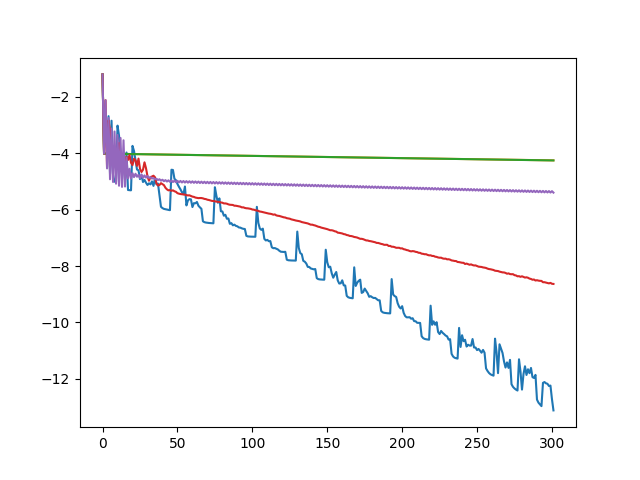

In [55]:
figure()
for proj in ['HIPswitch','Dykstra','Alternate','pureHIP','oneHIP']:
        ex = EG.retrieve_main(f'article_experiments/compare_QFT_1e7.h5', proj_type=proj)
        plot( np.log10(-ex['least_ev']))


# Effect of sample size

In [73]:
EG.generate_simulations('article_experiments/sample_size_QFT_3e5', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=3e5 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [74]:
EG.generate_simulations('article_experiments/sample_size_QFT_1e6', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [75]:
EG.generate_simulations('article_experiments/sample_size_QFT_3e6', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=3e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [76]:
EG.generate_simulations('article_experiments/sample_size_QFT_1e7', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=1e7 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [77]:
EG.generate_simulations('article_experiments/sample_size_QFT_3e7', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=3e7 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [78]:
EG.generate_simulations('article_experiments/sample_size_QFT_1e8', 2**5, Ch.QFTKraus(2**5), 'Pauli',
                        cycles=1e8 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [7]:
18**5

1889568

<IPython.core.display.Javascript object>


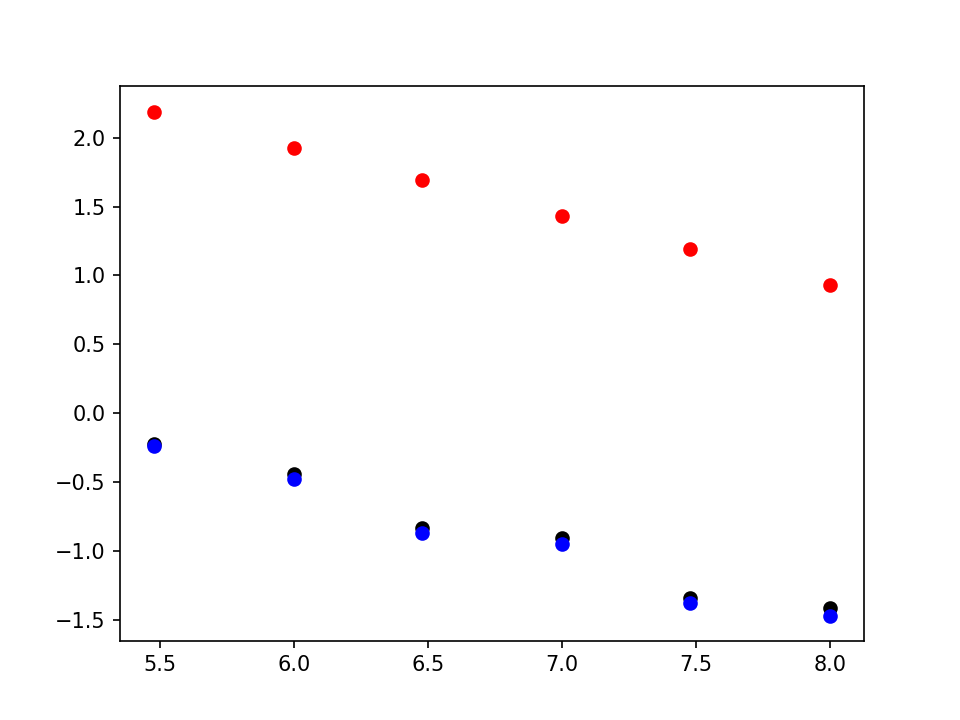

In [58]:
figure()
for n in ['3e5', '1e6', '3e6', '1e7', '30e6', '1e8']:
#for n in ['3e5']: 
    for i in range(1):
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_{n}.h5', exp_number=i)
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][-1]), color='k')
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][0]), color='r')
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][1]), color='b')

        

<IPython.core.display.Javascript object>


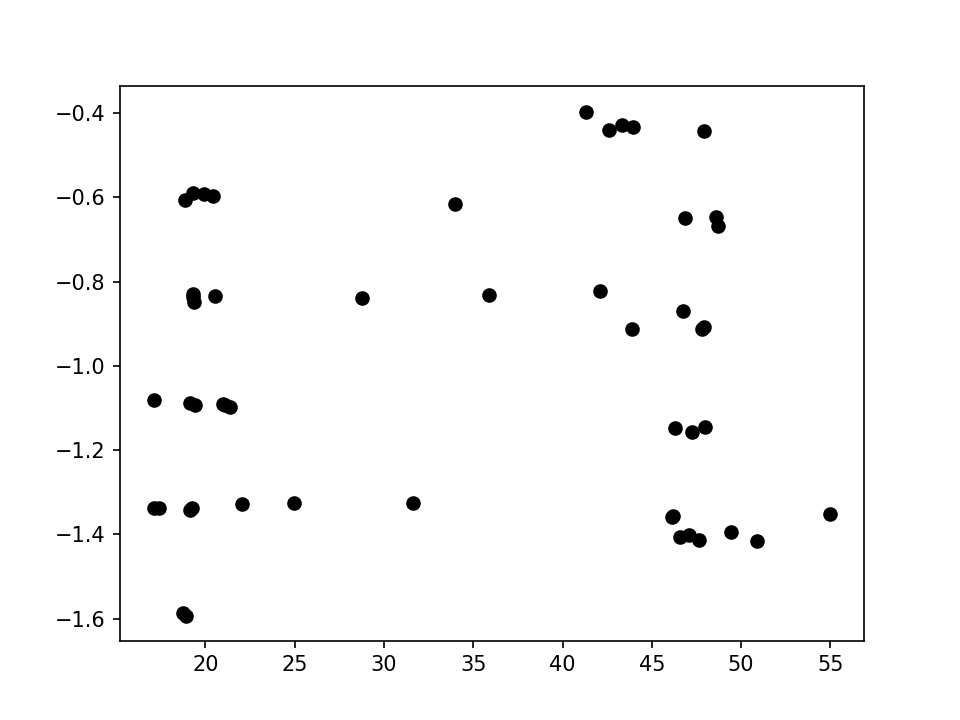

In [4]:
figure()
for n in ['1e6', '3e6', '1e7', '30e6', '1e8']:
    for i in range(10):
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_{n}.h5', exp_number=i)
        scatter((ex['time_proj']), np.log10(ex['dist_L1'][-1]), color='k')

<IPython.core.display.Javascript object>


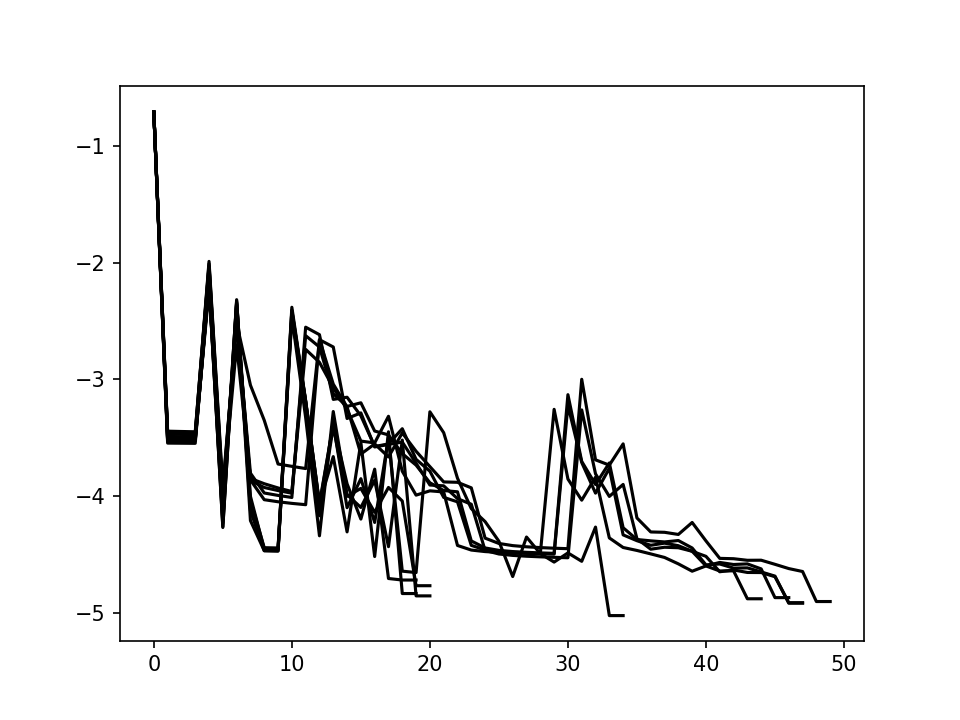

In [5]:
figure()

for i in range(10):
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_1e6.h5', exp_number=i)
        plot(np.log10(-ex['least_ev']), color='k')

<IPython.core.display.Javascript object>


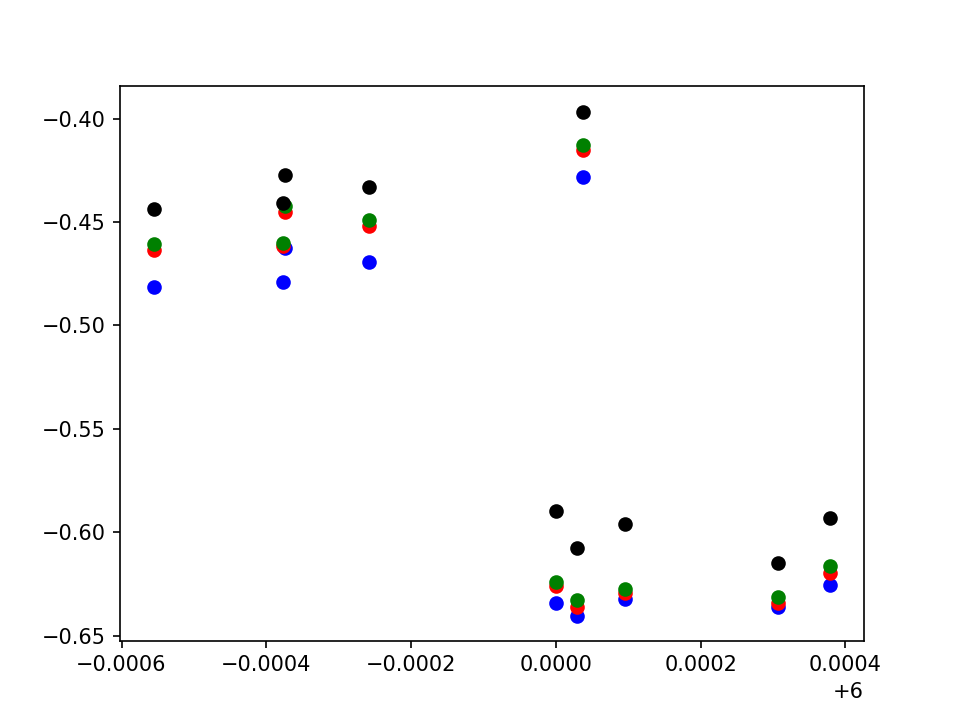

In [12]:
figure()
n = '1e6'
for i in range(10):
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_{n}.h5', exp_number=i)
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][-1]), color='k')
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][1]), color='b')
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_{n}_precise.h5', exp_number=i)
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][-1]), color='r')
        ex = EG.retrieve_main(f'article_experiments/sample_size_QFT_{n}_halfprecise.h5', exp_number=i)
        scatter(np.log10(ex['sample_size']), np.log10(ex['dist_L1'][-1]), color='g')


# Effect of rank

In [5]:
def sum_ru_equal(dim, rank):
    return Ch.KrausOp(dim, rank * [1 / rank], np.arange(1, 1 + 5 * rank, 5))

In [6]:
def sum_ru_geometric(dim, mult, rank=32):
    weights_unnormalized = mult**np.arange(rank)
    weights = weights_unnormalized / (weights_unnormalized).sum()
    return Ch.KrausOp(dim, weights, np.arange(1, 1 + 5 * rank, 5))

In [81]:
EG.generate_simulations('article_experiments/rank_geom16', 2**5, sum_ru_geometric(2**5, 4**(1/16)), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [82]:
EG.generate_simulations('article_experiments/rank_geom8', 2**5, sum_ru_geometric(2**5, 4**(1/8)), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [83]:
EG.generate_simulations('article_experiments/rank_geom4', 2**5, sum_ru_geometric(2**5, 4**(1/4)), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [84]:
EG.generate_simulations('article_experiments/rank_geom2', 2**5, sum_ru_geometric(2**5, 4**(1/2)), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [85]:
EG.generate_simulations('article_experiments/rank_geom1', 2**5, sum_ru_geometric(2**5, 4**(1)), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [86]:
EG.generate_simulations('article_experiments/rank_equal1', 2**5, sum_ru_equal(2**5, 1), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [87]:
EG.generate_simulations('article_experiments/rank_equal2', 2**5, sum_ru_equal(2**5, 2), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [88]:
EG.generate_simulations('article_experiments/rank_equal4', 2**5, sum_ru_equal(2**5, 4), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [89]:
EG.generate_simulations('article_experiments/rank_equal8', 2**5, sum_ru_equal(2**5, 8), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [90]:
EG.generate_simulations('article_experiments/rank_equal16', 2**5, sum_ru_equal(2**5, 16), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [91]:
EG.generate_simulations('article_experiments/rank_equal32', 2**5, sum_ru_equal(2**5, 32), 'Pauli',
                        cycles=1e6 / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

<IPython.core.display.Javascript object>


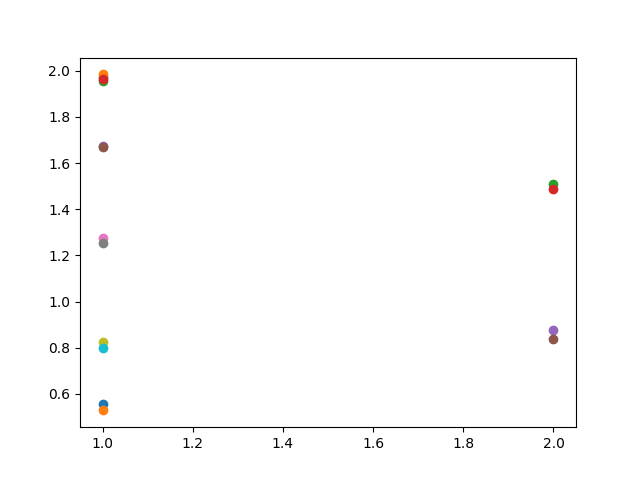

In [24]:
figure()

for f in ['t1', 't2', 't3', 't4', 't5', 't6']:
        ex = EG.retrieve_main(f'article_experiments/{f}.h5')
        scatter(1,  ex['dist_L1'][-1])
        scatter(1,  ex['dist_L1'][1])
for f in ['s1', 's2']:
        ex = EG.retrieve_main(f'article_experiments/{f}.h5')
        scatter(2,  ex['dist_L1'][-1])
        scatter(2,  ex['dist_L1'][1]) 

<IPython.core.display.Javascript object>


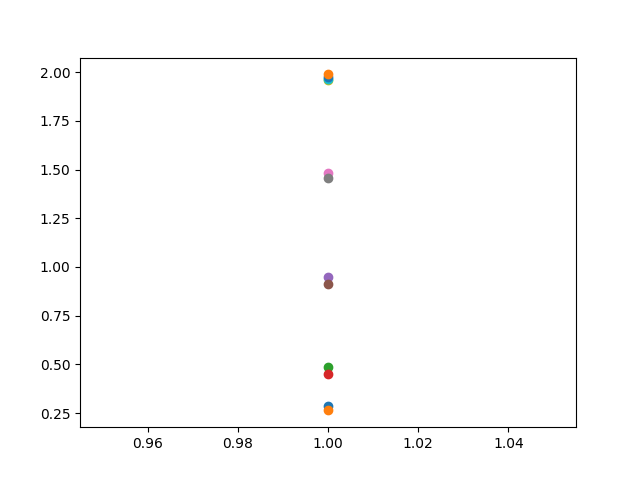

In [3]:
figure()

for f in ['1', '2', '4', '8', '16', '32']:
        ex = EG.retrieve_main(f'article_experiments/rank_equal{f}.h5')
        scatter(1,  ex['dist_L1'][-1])
        scatter(1,  ex['dist_L1'][1])


<IPython.core.display.Javascript object>


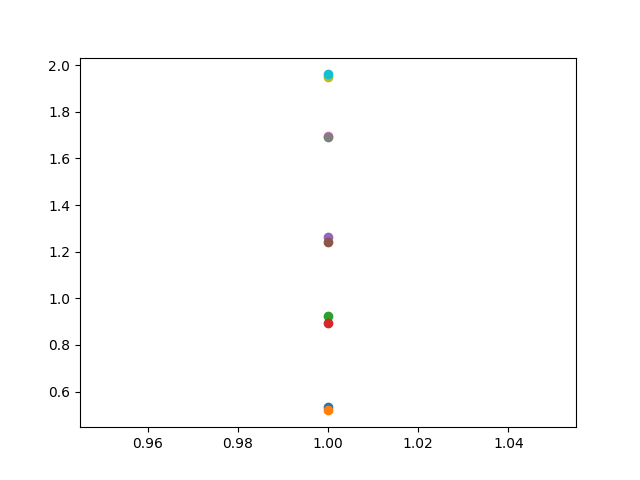

In [4]:
figure()

for f in ['1', '2', '4', '8', '16']:
        ex = EG.retrieve_main(f'article_experiments/rank_geom{f}.h5')
        scatter(1,  ex['dist_L1'][-1])
        scatter(1,  ex['dist_L1'][1])


In [7]:
for n, nn in [(1e7, '1e7'), (1e8, '1e8')]:
    for rank in [1, 2, 4, 8, 16, 32]:
        EG.generate_simulations(f'article_experiments/rank_equal{rank}_{nn}', 2**5, sum_ru_equal(2**5, rank), 'Pauli',
                        cycles= n / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

Enters iteration 0
Smallest eigenvalue is minus 0.00010339573978514216
Enters iteration 1
Smallest eigenvalue is minus 0.00010317829006123993
Enters iteration 2
Smallest eigenvalue is minus 0.00010298071937285208
Enters iteration 3
Smallest eigenvalue is minus 0.0020648440825308443
Enters iteration 4
Smallest eigenvalue is minus 2.1148169807282498e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0012974620447614921
Enters iteration 6
Smallest eigenvalue is minus 2.8889189183557218e-05
Enters iteration 7
Smallest eigenvalue is minus 1.1681925926058617e-05
Enters iteration 8
Smallest eigenvalue is minus 1.1648140439626783e-05
Enters iteration 9
Smallest eigenvalue is minus 0.0010805826085867388
Enters iteration 10
Smallest eigenvalue is minus 0.00024104818617539698
Enters iteration 11
Smallest eigenvalue is minus 3.035710919813391e-05
Enters iteration 12
Smallest eigenvalue is minus 6.81031520515632e-05
Enters iteration 13
Smallest eigenvalue is minus 1.6032246183164195e-05
Enters i

Smallest eigenvalue is minus 1.3546819391241929e-05
Enters iteration 31
Smallest eigenvalue is minus 1.3380754545955948e-05
Enters iteration 32
Smallest eigenvalue is minus 1.3245029851286969e-05
Enters iteration 33
Smallest eigenvalue is minus 0.00036750688313339934
Enters iteration 34
Smallest eigenvalue is minus 7.815718389166781e-05
Enters iteration 35
Smallest eigenvalue is minus 7.256992208288382e-05
Enters iteration 36
Smallest eigenvalue is minus 0.0001350471235221894
Enters iteration 37
Smallest eigenvalue is minus 2.030922090421339e-05
Enters iteration 38
Smallest eigenvalue is minus 1.88722643279841e-05
Enters iteration 39
Smallest eigenvalue is minus 1.6827395352434472e-05
Enters iteration 40
Smallest eigenvalue is minus 1.8214694906984934e-05
Enters iteration 41
Smallest eigenvalue is minus 1.6511765040075708e-05
Enters iteration 42
Smallest eigenvalue is minus 1.3594858838975158e-05
Enters iteration 43
Smallest eigenvalue is minus 1.0986795320151186e-05
Enters iteration 4

Smallest eigenvalue is minus 9.909845806144128e-06
Enters iteration 47
Smallest eigenvalue is minus 5.925046051166293e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00012964183045009628
Enters iteration 1
Smallest eigenvalue is minus 0.0001287746138894807
Enters iteration 2
Smallest eigenvalue is minus 0.00012796711554130817
Enters iteration 3
Smallest eigenvalue is minus 0.0041614957260059674
Enters iteration 4
Smallest eigenvalue is minus 7.909019184232029e-05
Enters iteration 5
Smallest eigenvalue is minus 0.000664073846655587
Enters iteration 6
Smallest eigenvalue is minus 7.123249127250419e-05
Enters iteration 7
Smallest eigenvalue is minus 0.0007342826997620887
Enters iteration 8
Smallest eigenvalue is minus 6.428025168633672e-05
Enters iteration 9
Smallest eigenvalue is minus 4.9122199422922425e-05
Enters iteration 10
Smallest eigenvalue is minus 4.519224574108067e-05
Enters iteration 11
Smallest eigenvalue is minus 4.2619773228751765e-05
Enters iteration 12
Smallest eige

Smallest eigenvalue is minus 2.2634580861347476e-05
Enters iteration 14
Smallest eigenvalue is minus 0.0001264550485689147
Enters iteration 15
Smallest eigenvalue is minus 2.7913995659573023e-05
Enters iteration 16
Smallest eigenvalue is minus 4.093658241854828e-05
Enters iteration 17
Smallest eigenvalue is minus 2.4939161069244933e-05
Enters iteration 18
Smallest eigenvalue is minus 5.062317764621629e-05
Enters iteration 19
Smallest eigenvalue is minus 7.010431220915843e-06
Enters iteration 20
Smallest eigenvalue is minus 6.801309981470171e-06
Enters iteration 21
Smallest eigenvalue is minus 6.59913233544918e-06
Enters iteration 22
Smallest eigenvalue is minus 0.00016495956159538833
Enters iteration 23
Smallest eigenvalue is minus 0.00011358475409574412
Enters iteration 24
Smallest eigenvalue is minus 7.21257323740486e-05
Enters iteration 25
Smallest eigenvalue is minus 4.036043946901674e-05
Enters iteration 26
Smallest eigenvalue is minus 2.831540873182669e-05
Enters iteration 27
Sma

Smallest eigenvalue is minus 6.465968548759437e-06
Enters iteration 17
Smallest eigenvalue is minus 6.094682791967853e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00012190289488653335
Enters iteration 1
Smallest eigenvalue is minus 0.00012138596529460907
Enters iteration 2
Smallest eigenvalue is minus 0.00012091659959085373
Enters iteration 3
Smallest eigenvalue is minus 0.0015067173003167822
Enters iteration 4
Smallest eigenvalue is minus 3.0180650294173903e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0009240021193755336
Enters iteration 6
Smallest eigenvalue is minus 4.3915126804127395e-05
Enters iteration 7
Smallest eigenvalue is minus 1.529266941552408e-05
Enters iteration 8
Smallest eigenvalue is minus 1.5194972989633991e-05
Enters iteration 9
Smallest eigenvalue is minus 0.000759351907417502
Enters iteration 10
Smallest eigenvalue is minus 0.00010698518507868237
Enters iteration 11
Smallest eigenvalue is minus 2.1995769356493557e-05
Enters iteration 12
Smallest 

Smallest eigenvalue is minus 7.820811674611007e-06
Enters iteration 33
Smallest eigenvalue is minus 3.3361547624091905e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00013324623577664726
Enters iteration 1
Smallest eigenvalue is minus 0.0001326738153574036
Enters iteration 2
Smallest eigenvalue is minus 0.00013215322948927348
Enters iteration 3
Smallest eigenvalue is minus 0.0015036016099773293
Enters iteration 4
Smallest eigenvalue is minus 2.6806981668292015e-05
Enters iteration 5
Smallest eigenvalue is minus 0.001054006115676189
Enters iteration 6
Smallest eigenvalue is minus 3.0947877373616895e-05
Enters iteration 7
Smallest eigenvalue is minus 1.4216537091080619e-05
Enters iteration 8
Smallest eigenvalue is minus 1.4104939609127923e-05
Enters iteration 9
Smallest eigenvalue is minus 0.000663878212941577
Enters iteration 10
Smallest eigenvalue is minus 0.00011742351037176722
Enters iteration 11
Smallest eigenvalue is minus 2.1268117905311803e-05
Enters iteration 12
Smallest 

Smallest eigenvalue is minus 1.9254915484875563e-05
Enters iteration 11
Smallest eigenvalue is minus 0.0004904291837825678
Enters iteration 12
Smallest eigenvalue is minus 1.9614114640061803e-05
Enters iteration 13
Smallest eigenvalue is minus 4.187468526985367e-05
Enters iteration 14
Smallest eigenvalue is minus 8.992951178136866e-06
Enters iteration 15
Smallest eigenvalue is minus 3.4565138294469096e-05
Enters iteration 16
Smallest eigenvalue is minus 7.27919867283169e-06
Enters iteration 17
Smallest eigenvalue is minus 3.902899121560704e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0001877648707605186
Enters iteration 1
Smallest eigenvalue is minus 0.00018494146942131884
Enters iteration 2
Smallest eigenvalue is minus 0.0001823805930999546
Enters iteration 3
Smallest eigenvalue is minus 0.001179051832487995
Enters iteration 4
Smallest eigenvalue is minus 3.4642616834940234e-05
Enters iteration 5
Smallest eigenvalue is minus 0.000621369528638432
Enters iteration 6
Smallest ei

Smallest eigenvalue is minus 0.00023457610315677383
Enters iteration 3
Smallest eigenvalue is minus 0.0008378059932721012
Enters iteration 4
Smallest eigenvalue is minus 4.463249058729371e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0005332724725585884
Enters iteration 6
Smallest eigenvalue is minus 5.614902268787818e-05
Enters iteration 7
Smallest eigenvalue is minus 2.2652191349123713e-05
Enters iteration 8
Smallest eigenvalue is minus 2.2066910878306364e-05
Enters iteration 9
Smallest eigenvalue is minus 2.161134029798391e-05
Enters iteration 10
Smallest eigenvalue is minus 2.121013571028969e-05
Enters iteration 11
Smallest eigenvalue is minus 0.00027106938914604533
Enters iteration 12
Smallest eigenvalue is minus 1.7627333127380457e-05
Enters iteration 13
Smallest eigenvalue is minus 2.0512525752229485e-05
Enters iteration 14
Smallest eigenvalue is minus 1.0434284336826542e-05
Enters iteration 15
Smallest eigenvalue is minus 3.7113434591216375e-06
Enters iteration 0
Smalle

Smallest eigenvalue is minus 7.964547379832063e-05
Enters iteration 7
Smallest eigenvalue is minus 2.384557561137899e-05
Enters iteration 8
Smallest eigenvalue is minus 2.3218597381961854e-05
Enters iteration 9
Smallest eigenvalue is minus 2.274854632234261e-05
Enters iteration 10
Smallest eigenvalue is minus 0.00046093514427162437
Enters iteration 11
Smallest eigenvalue is minus 3.2504377515689986e-05
Enters iteration 12
Smallest eigenvalue is minus 1.254251391877722e-05
Enters iteration 13
Smallest eigenvalue is minus 2.5746663887550986e-05
Enters iteration 14
Smallest eigenvalue is minus 4.99962710455714e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0003048027281337975
Enters iteration 1
Smallest eigenvalue is minus 0.0002931973307398012
Enters iteration 2
Smallest eigenvalue is minus 0.0002829407822099575
Enters iteration 3
Smallest eigenvalue is minus 0.0005437769714050807
Enters iteration 4
Smallest eigenvalue is minus 5.744003100901392e-05
Enters iteration 5
Smallest eig

Smallest eigenvalue is minus 0.00012116579349409572
Enters iteration 13
Smallest eigenvalue is minus 9.367587356206297e-06
Enters iteration 14
Smallest eigenvalue is minus 1.0327545327431245e-05
Enters iteration 15
Smallest eigenvalue is minus 3.0687944908595956e-06
Enters iteration 0
Smallest eigenvalue is minus 0.000310024459091453
Enters iteration 1
Smallest eigenvalue is minus 0.00029812723503420073
Enters iteration 2
Smallest eigenvalue is minus 0.00028761899026116263
Enters iteration 3
Smallest eigenvalue is minus 0.00045351340204440136
Enters iteration 4
Smallest eigenvalue is minus 5.1894912348966756e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00035553955074566493
Enters iteration 6
Smallest eigenvalue is minus 5.9375877940719066e-05
Enters iteration 7
Smallest eigenvalue is minus 2.4723140656163478e-05
Enters iteration 8
Smallest eigenvalue is minus 2.328226080796757e-05
Enters iteration 9
Smallest eigenvalue is minus 2.2278790953605288e-05
Enters iteration 10
Smalle

Smallest eigenvalue is minus 1.8643304512783855e-05
Enters iteration 16
Smallest eigenvalue is minus 6.333851326106357e-06
Enters iteration 17
Smallest eigenvalue is minus 5.33113011963328e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0004805829080127828
Enters iteration 1
Smallest eigenvalue is minus 0.0004613623549868729
Enters iteration 2
Smallest eigenvalue is minus 0.0004443106106669845
Enters iteration 3
Smallest eigenvalue is minus 0.0008159805368858044
Enters iteration 4
Smallest eigenvalue is minus 8.476910368313907e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00065139143639038
Enters iteration 6
Smallest eigenvalue is minus 9.472167484631504e-05
Enters iteration 7
Smallest eigenvalue is minus 4.0607508977504016e-05
Enters iteration 8
Smallest eigenvalue is minus 3.782341793727187e-05
Enters iteration 9
Smallest eigenvalue is minus 3.5849479217503775e-05
Enters iteration 10
Smallest eigenvalue is minus 3.4351181552974515e-05
Enters iteration 11
Smallest eigenv

Smallest eigenvalue is minus 0.000283060083908088
Enters iteration 12
Smallest eigenvalue is minus 7.934751340644087e-05
Enters iteration 13
Smallest eigenvalue is minus 1.323986640823962e-05
Enters iteration 14
Smallest eigenvalue is minus 2.0542518300147837e-05
Enters iteration 15
Smallest eigenvalue is minus 6.733681025480235e-06
Enters iteration 16
Smallest eigenvalue is minus 2.4895683416240857e-05
Enters iteration 17
Smallest eigenvalue is minus 2.527522695508119e-06
Enters iteration 18
Smallest eigenvalue is minus 4.379102276424593e-05
Enters iteration 19
Smallest eigenvalue is minus 1.0613337569596993e-06
Enters iteration 0
Smallest eigenvalue is minus 3.209517038437279e-05
Enters iteration 1
Smallest eigenvalue is minus 3.203169040189661e-05
Enters iteration 2
Smallest eigenvalue is minus 3.1974148036074456e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0007098601217204735
Enters iteration 4
Smallest eigenvalue is minus 6.799807857778027e-06
Enters iteration 5
Smallest 

Smallest eigenvalue is minus 1.5733121682381974e-05
Enters iteration 11
Smallest eigenvalue is minus 1.5081447648828679e-05
Enters iteration 12
Smallest eigenvalue is minus 1.4536458850560113e-05
Enters iteration 13
Smallest eigenvalue is minus 1.4055837727900778e-05
Enters iteration 14
Smallest eigenvalue is minus 0.00021138013102028688
Enters iteration 15
Smallest eigenvalue is minus 0.00014051296621845247
Enters iteration 16
Smallest eigenvalue is minus 9.441462141558836e-05
Enters iteration 17
Smallest eigenvalue is minus 5.860931556704977e-05
Enters iteration 18
Smallest eigenvalue is minus 5.222658717527003e-05
Enters iteration 19
Smallest eigenvalue is minus 2.8590814898052956e-05
Enters iteration 20
Smallest eigenvalue is minus 3.453450427654443e-05
Enters iteration 21
Smallest eigenvalue is minus 2.155780509377395e-05
Enters iteration 22
Smallest eigenvalue is minus 1.7542262497474263e-05
Enters iteration 23
Smallest eigenvalue is minus 1.4045412818006974e-05
Enters iteration 

Smallest eigenvalue is minus 0.0007358195956729849
Enters iteration 4
Smallest eigenvalue is minus 6.938815903243707e-06
Enters iteration 5
Smallest eigenvalue is minus 0.0004520556687733076
Enters iteration 6
Smallest eigenvalue is minus 1.0273424360860259e-05
Enters iteration 7
Smallest eigenvalue is minus 3.911712115318402e-06
Enters iteration 8
Smallest eigenvalue is minus 3.897351753073958e-06
Enters iteration 9
Smallest eigenvalue is minus 0.00034418451543052485
Enters iteration 10
Smallest eigenvalue is minus 9.007792209559587e-05
Enters iteration 11
Smallest eigenvalue is minus 1.156237275184743e-05
Enters iteration 12
Smallest eigenvalue is minus 3.803381572758717e-05
Enters iteration 13
Smallest eigenvalue is minus 6.713624595821532e-06
Enters iteration 14
Smallest eigenvalue is minus 4.683893552082518e-05
Enters iteration 15
Smallest eigenvalue is minus 7.071274587598484e-06
Enters iteration 16
Smallest eigenvalue is minus 1.163161197713e-05
Enters iteration 17
Smallest eige

Smallest eigenvalue is minus 3.3255242785538392e-06
Enters iteration 47
Smallest eigenvalue is minus 3.4067515364610376e-06
Enters iteration 48
Smallest eigenvalue is minus 3.052226567521589e-06
Enters iteration 49
Smallest eigenvalue is minus 2.8721683799112643e-06
Enters iteration 50
Smallest eigenvalue is minus 2.587926141366294e-06
Enters iteration 51
Smallest eigenvalue is minus 2.530882775901483e-06
Enters iteration 52
Smallest eigenvalue is minus 2.4613164796102718e-06
Enters iteration 53
Smallest eigenvalue is minus 1.5237229351760033e-06
Enters iteration 0
Smallest eigenvalue is minus 5.266824890202596e-05
Enters iteration 1
Smallest eigenvalue is minus 5.223152899597782e-05
Enters iteration 2
Smallest eigenvalue is minus 5.182810745820525e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0009122340838157528
Enters iteration 4
Smallest eigenvalue is minus 1.1358266692749926e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0003687905537325343
Enters iteration 6
Smalles

Smallest eigenvalue is minus 2.9838903049350802e-06
Enters iteration 24
Smallest eigenvalue is minus 2.909381482450217e-06
Enters iteration 25
Smallest eigenvalue is minus 4.556627232462525e-05
Enters iteration 26
Smallest eigenvalue is minus 9.691644784026245e-06
Enters iteration 27
Smallest eigenvalue is minus 6.574943082805614e-06
Enters iteration 28
Smallest eigenvalue is minus 7.798725494163194e-06
Enters iteration 29
Smallest eigenvalue is minus 2.3641183189186772e-06
Enters iteration 30
Smallest eigenvalue is minus 2.906441022997138e-06
Enters iteration 31
Smallest eigenvalue is minus 2.7346774683617295e-06
Enters iteration 32
Smallest eigenvalue is minus 1.1901492753384373e-06
Enters iteration 0
Smallest eigenvalue is minus 5.411210452430494e-05
Enters iteration 1
Smallest eigenvalue is minus 5.365295241876968e-05
Enters iteration 2
Smallest eigenvalue is minus 5.3228560316680924e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0009328825017159722
Enters iteration 4
Smalle

Smallest eigenvalue is minus 1.111873175943004e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0003389279003627365
Enters iteration 6
Smallest eigenvalue is minus 1.660206442722528e-05
Enters iteration 7
Smallest eigenvalue is minus 9.211694183067705e-06
Enters iteration 8
Smallest eigenvalue is minus 8.81714283615989e-06
Enters iteration 9
Smallest eigenvalue is minus 8.547490547271858e-06
Enters iteration 10
Smallest eigenvalue is minus 0.0001870737658841226
Enters iteration 11
Smallest eigenvalue is minus 0.00011369770620082378
Enters iteration 12
Smallest eigenvalue is minus 3.777819431885592e-05
Enters iteration 13
Smallest eigenvalue is minus 4.2288146754041244e-05
Enters iteration 14
Smallest eigenvalue is minus 2.081568602736699e-05
Enters iteration 15
Smallest eigenvalue is minus 1.5442775481505886e-05
Enters iteration 16
Smallest eigenvalue is minus 1.71332433419868e-05
Enters iteration 17
Smallest eigenvalue is minus 1.1305889298034896e-05
Enters iteration 18
Smallest 

Enters iteration 0
Smallest eigenvalue is minus 5.862153768070135e-05
Enters iteration 1
Smallest eigenvalue is minus 5.814661684318168e-05
Enters iteration 2
Smallest eigenvalue is minus 5.7717857898439906e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0003159615806331294
Enters iteration 4
Smallest eigenvalue is minus 1.1254021352238187e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00020700278381747663
Enters iteration 6
Smallest eigenvalue is minus 1.4538077391313793e-05
Enters iteration 7
Smallest eigenvalue is minus 6.023762382244823e-06
Enters iteration 8
Smallest eigenvalue is minus 5.964924698221764e-06
Enters iteration 9
Smallest eigenvalue is minus 5.909347384159856e-06
Enters iteration 10
Smallest eigenvalue is minus 5.85594130941752e-06
Enters iteration 11
Smallest eigenvalue is minus 0.00014597755627966896
Enters iteration 12
Smallest eigenvalue is minus 1.8472854315741633e-05
Enters iteration 13
Smallest eigenvalue is minus 3.4542284854303713e-06
Enters ite

Smallest eigenvalue is minus 5.36984075700334e-05
Enters iteration 11
Smallest eigenvalue is minus 9.39587616224086e-06
Enters iteration 12
Smallest eigenvalue is minus 8.60905481346506e-06
Enters iteration 13
Smallest eigenvalue is minus 3.1116999412152424e-06
Enters iteration 14
Smallest eigenvalue is minus 1.3656101801448484e-05
Enters iteration 15
Smallest eigenvalue is minus 1.6206023398605883e-06
Enters iteration 0
Smallest eigenvalue is minus 5.47903454673193e-05
Enters iteration 1
Smallest eigenvalue is minus 5.435113009160317e-05
Enters iteration 2
Smallest eigenvalue is minus 5.395527801245539e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0003203761637895065
Enters iteration 4
Smallest eigenvalue is minus 8.961047245575226e-06
Enters iteration 5
Smallest eigenvalue is minus 0.00020311614063437942
Enters iteration 6
Smallest eigenvalue is minus 1.0790617475089661e-05
Enters iteration 7
Smallest eigenvalue is minus 5.648689988447107e-06
Enters iteration 8
Smallest eigen

Smallest eigenvalue is minus 4.986421773813558e-06
Enters iteration 14
Smallest eigenvalue is minus 4.007604152579518e-06
Enters iteration 15
Smallest eigenvalue is minus 3.6310173498528014e-06
Enters iteration 16
Smallest eigenvalue is minus 1.3842345112685763e-06
Enters iteration 0
Smallest eigenvalue is minus 8.325869726413629e-05
Enters iteration 1
Smallest eigenvalue is minus 8.154817820574175e-05
Enters iteration 2
Smallest eigenvalue is minus 8.00099007886411e-05
Enters iteration 3
Smallest eigenvalue is minus 0.00029400137309659453
Enters iteration 4
Smallest eigenvalue is minus 1.3792455541088435e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00018268961104936083
Enters iteration 6
Smallest eigenvalue is minus 1.4585396794314125e-05
Enters iteration 7
Smallest eigenvalue is minus 7.219687174352947e-06
Enters iteration 8
Smallest eigenvalue is minus 6.876392257686664e-06
Enters iteration 9
Smallest eigenvalue is minus 6.637022465094973e-06
Enters iteration 10
Smallest ei

Smallest eigenvalue is minus 9.94592805713514e-07
Enters iteration 0
Smallest eigenvalue is minus 0.00010854151080782998
Enters iteration 1
Smallest eigenvalue is minus 0.0001049267289095034
Enters iteration 2
Smallest eigenvalue is minus 0.00010172613345286503
Enters iteration 3
Smallest eigenvalue is minus 0.00015546203340860274
Enters iteration 4
Smallest eigenvalue is minus 1.8078618933833654e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00010842405032274194
Enters iteration 6
Smallest eigenvalue is minus 1.682738535690137e-05
Enters iteration 7
Smallest eigenvalue is minus 8.28279226601809e-06
Enters iteration 8
Smallest eigenvalue is minus 7.981952947835455e-06
Enters iteration 9
Smallest eigenvalue is minus 7.733086023466647e-06
Enters iteration 10
Smallest eigenvalue is minus 7.505689016948234e-06
Enters iteration 11
Smallest eigenvalue is minus 3.2100437223037276e-05
Enters iteration 12
Smallest eigenvalue is minus 3.2305981524692568e-06
Enters iteration 13
Smallest ei

Smallest eigenvalue is minus 7.34227131982937e-05
Enters iteration 6
Smallest eigenvalue is minus 1.7470608155703335e-05
Enters iteration 7
Smallest eigenvalue is minus 9.684563200292778e-06
Enters iteration 8
Smallest eigenvalue is minus 7.79440733935553e-06
Enters iteration 9
Smallest eigenvalue is minus 7.20997317322614e-06
Enters iteration 10
Smallest eigenvalue is minus 6.740881394902604e-06
Enters iteration 11
Smallest eigenvalue is minus 6.33618274224147e-06
Enters iteration 12
Smallest eigenvalue is minus 5.972316845632035e-06
Enters iteration 13
Smallest eigenvalue is minus 1.7109777406153058e-05
Enters iteration 14
Smallest eigenvalue is minus 1.1058559430079935e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00015644041685125237
Enters iteration 1
Smallest eigenvalue is minus 0.00014562808020504844
Enters iteration 2
Smallest eigenvalue is minus 0.0001364524613242434
Enters iteration 3
Smallest eigenvalue is minus 0.00012689659189667868
Enters iteration 4
Smallest eige

Smallest eigenvalue is minus 7.049730422472928e-06
Enters iteration 10
Smallest eigenvalue is minus 6.610050388995367e-06
Enters iteration 11
Smallest eigenvalue is minus 1.725185659869481e-05
Enters iteration 12
Smallest eigenvalue is minus 1.6104353597340499e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00013540727850060096
Enters iteration 1
Smallest eigenvalue is minus 0.0001263270570410536
Enters iteration 2
Smallest eigenvalue is minus 0.0001186468516283785
Enters iteration 3
Smallest eigenvalue is minus 0.00013002423684894658
Enters iteration 4
Smallest eigenvalue is minus 2.25648731420151e-05
Enters iteration 5
Smallest eigenvalue is minus 7.676713422644745e-05
Enters iteration 6
Smallest eigenvalue is minus 1.435795688523265e-05
Enters iteration 7
Smallest eigenvalue is minus 8.570766953079737e-06
Enters iteration 8
Smallest eigenvalue is minus 7.495016382286939e-06
Enters iteration 9
Smallest eigenvalue is minus 6.855940656790681e-06
Enters iteration 10
Smallest eigen

In [8]:
for n, nn in [(1e7, '1e7'), (1e8, '1e8')]:
    for mult in [1, 2, 4, 8, 16]:
        EG.generate_simulations(f'article_experiments/rank_geom{mult}_{nn}', 2**5, sum_ru_geometric(2**5, 4**(1/mult)), 'Pauli',
                        cycles= n / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

Enters iteration 0
Smallest eigenvalue is minus 0.00016742185068654313
Enters iteration 1
Smallest eigenvalue is minus 0.00016605089263662214
Enters iteration 2
Smallest eigenvalue is minus 0.00016478198935977774
Enters iteration 3
Smallest eigenvalue is minus 0.0019873452248333374
Enters iteration 4
Smallest eigenvalue is minus 3.278830575199383e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0011056686504152915
Enters iteration 6
Smallest eigenvalue is minus 7.174365312130654e-05
Enters iteration 7
Smallest eigenvalue is minus 2.1535639374714644e-05
Enters iteration 8
Smallest eigenvalue is minus 2.127742832618119e-05
Enters iteration 9
Smallest eigenvalue is minus 2.107537934477799e-05
Enters iteration 10
Smallest eigenvalue is minus 2.0905805027194033e-05
Enters iteration 11
Smallest eigenvalue is minus 0.0006988698150190384
Enters iteration 12
Smallest eigenvalue is minus 0.00012888824032853864
Enters iteration 13
Smallest eigenvalue is minus 3.44141378952205e-05
Enters iter

Smallest eigenvalue is minus 0.0010837190667127897
Enters iteration 6
Smallest eigenvalue is minus 6.048131907734693e-05
Enters iteration 7
Smallest eigenvalue is minus 2.258687995903525e-05
Enters iteration 8
Smallest eigenvalue is minus 2.2220906616224288e-05
Enters iteration 9
Smallest eigenvalue is minus 2.19549388085251e-05
Enters iteration 10
Smallest eigenvalue is minus 2.1744830699021845e-05
Enters iteration 11
Smallest eigenvalue is minus 2.156811651863673e-05
Enters iteration 12
Smallest eigenvalue is minus 0.0006689970691352124
Enters iteration 13
Smallest eigenvalue is minus 9.251803243250049e-05
Enters iteration 14
Smallest eigenvalue is minus 3.758208218977075e-05
Enters iteration 15
Smallest eigenvalue is minus 3.859149246438948e-05
Enters iteration 16
Smallest eigenvalue is minus 3.0647442862429013e-05
Enters iteration 17
Smallest eigenvalue is minus 2.831188277129953e-05
Enters iteration 18
Smallest eigenvalue is minus 8.421398810604425e-06
Enters iteration 19
Smallest

Smallest eigenvalue is minus 2.1389386904800822e-05
Enters iteration 10
Smallest eigenvalue is minus 2.120515101994279e-05
Enters iteration 11
Smallest eigenvalue is minus 0.0007623138732935904
Enters iteration 12
Smallest eigenvalue is minus 0.00013504693495013518
Enters iteration 13
Smallest eigenvalue is minus 4.209840958924474e-05
Enters iteration 14
Smallest eigenvalue is minus 4.998452953394555e-05
Enters iteration 15
Smallest eigenvalue is minus 3.1682055310244204e-05
Enters iteration 16
Smallest eigenvalue is minus 3.362529937933517e-05
Enters iteration 17
Smallest eigenvalue is minus 9.740624291994151e-06
Enters iteration 18
Smallest eigenvalue is minus 8.672196537841014e-06
Enters iteration 19
Smallest eigenvalue is minus 8.179704255695894e-06
Enters iteration 20
Smallest eigenvalue is minus 7.84914818092211e-06
Enters iteration 21
Smallest eigenvalue is minus 7.59641031731529e-06
Enters iteration 22
Smallest eigenvalue is minus 7.386836166311151e-06
Enters iteration 23
Small

Smallest eigenvalue is minus 0.00019922585688868726
Enters iteration 2
Smallest eigenvalue is minus 0.00019674754811310484
Enters iteration 3
Smallest eigenvalue is minus 0.001300107451098542
Enters iteration 4
Smallest eigenvalue is minus 3.897699523468205e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0007820074857361639
Enters iteration 6
Smallest eigenvalue is minus 6.800661148231967e-05
Enters iteration 7
Smallest eigenvalue is minus 2.2709875291319004e-05
Enters iteration 8
Smallest eigenvalue is minus 2.2409546949450556e-05
Enters iteration 9
Smallest eigenvalue is minus 2.21583490961027e-05
Enters iteration 10
Smallest eigenvalue is minus 2.193341942884731e-05
Enters iteration 11
Smallest eigenvalue is minus 0.0005195876641023327
Enters iteration 12
Smallest eigenvalue is minus 5.2289156709629506e-05
Enters iteration 13
Smallest eigenvalue is minus 2.479767546735784e-05
Enters iteration 14
Smallest eigenvalue is minus 2.1386042147938268e-05
Enters iteration 15
Smallest e

Smallest eigenvalue is minus 2.356626159484566e-05
Enters iteration 8
Smallest eigenvalue is minus 2.2993980227909318e-05
Enters iteration 9
Smallest eigenvalue is minus 2.253307546268174e-05
Enters iteration 10
Smallest eigenvalue is minus 2.2119928213218723e-05
Enters iteration 11
Smallest eigenvalue is minus 0.0002938469915508646
Enters iteration 12
Smallest eigenvalue is minus 2.969874721821231e-05
Enters iteration 13
Smallest eigenvalue is minus 1.878303637574943e-05
Enters iteration 14
Smallest eigenvalue is minus 1.442714225828378e-05
Enters iteration 15
Smallest eigenvalue is minus 1.5532947791964398e-05
Enters iteration 16
Smallest eigenvalue is minus 4.624714230992576e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0002577289249277172
Enters iteration 1
Smallest eigenvalue is minus 0.00025317005891893965
Enters iteration 2
Smallest eigenvalue is minus 0.00024902976554751265
Enters iteration 3
Smallest eigenvalue is minus 0.0009870332275831934
Enters iteration 4
Smallest

Smallest eigenvalue is minus 4.567030047569142e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0005953344373638374
Enters iteration 6
Smallest eigenvalue is minus 6.871164825794135e-05
Enters iteration 7
Smallest eigenvalue is minus 2.561374070056481e-05
Enters iteration 8
Smallest eigenvalue is minus 2.511030370597385e-05
Enters iteration 9
Smallest eigenvalue is minus 2.468572584023895e-05
Enters iteration 10
Smallest eigenvalue is minus 2.4298982621615335e-05
Enters iteration 11
Smallest eigenvalue is minus 0.00034641050498042766
Enters iteration 12
Smallest eigenvalue is minus 3.225672673789517e-05
Enters iteration 13
Smallest eigenvalue is minus 1.988955799493738e-05
Enters iteration 14
Smallest eigenvalue is minus 1.227422149605958e-05
Enters iteration 15
Smallest eigenvalue is minus 1.5490898738588483e-05
Enters iteration 16
Smallest eigenvalue is minus 4.896817564902264e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0002367750695345699
Enters iteration 1
Smallest e

Smallest eigenvalue is minus 0.0008187719501720512
Enters iteration 4
Smallest eigenvalue is minus 5.5736922858026905e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0006296531327715788
Enters iteration 6
Smallest eigenvalue is minus 7.073470959706498e-05
Enters iteration 7
Smallest eigenvalue is minus 2.8509880186004642e-05
Enters iteration 8
Smallest eigenvalue is minus 2.7384102470648016e-05
Enters iteration 9
Smallest eigenvalue is minus 2.6714266227631315e-05
Enters iteration 10
Smallest eigenvalue is minus 2.6127678736887866e-05
Enters iteration 11
Smallest eigenvalue is minus 2.5589161004442822e-05
Enters iteration 12
Smallest eigenvalue is minus 0.0003560976784287759
Enters iteration 13
Smallest eigenvalue is minus 3.181904151044892e-05
Enters iteration 14
Smallest eigenvalue is minus 1.2216047522988497e-05
Enters iteration 15
Smallest eigenvalue is minus 2.5417531102026294e-05
Enters iteration 16
Smallest eigenvalue is minus 5.009204162179206e-06
Enters iteration 0
Small

Smallest eigenvalue is minus 6.50974436509262e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0006872075458450906
Enters iteration 6
Smallest eigenvalue is minus 6.750039950581886e-05
Enters iteration 7
Smallest eigenvalue is minus 3.5460784533350525e-05
Enters iteration 8
Smallest eigenvalue is minus 3.38645519053817e-05
Enters iteration 9
Smallest eigenvalue is minus 3.2693854246646666e-05
Enters iteration 10
Smallest eigenvalue is minus 3.1741074940074145e-05
Enters iteration 11
Smallest eigenvalue is minus 3.091941915689404e-05
Enters iteration 12
Smallest eigenvalue is minus 0.0003114345378582181
Enters iteration 13
Smallest eigenvalue is minus 2.6902216908864755e-05
Enters iteration 14
Smallest eigenvalue is minus 2.260087162488612e-05
Enters iteration 15
Smallest eigenvalue is minus 1.2086328829226371e-05
Enters iteration 16
Smallest eigenvalue is minus 5.7617160489927345e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00042907844412165086
Enters iteration 1
Smallest

Smallest eigenvalue is minus 3.2779086137102685e-05
Enters iteration 8
Smallest eigenvalue is minus 3.0841158485186256e-05
Enters iteration 9
Smallest eigenvalue is minus 2.9854111811618685e-05
Enters iteration 10
Smallest eigenvalue is minus 2.9027704370530627e-05
Enters iteration 11
Smallest eigenvalue is minus 2.8263418588381015e-05
Enters iteration 12
Smallest eigenvalue is minus 0.0002074513550630859
Enters iteration 13
Smallest eigenvalue is minus 1.3207267295950047e-05
Enters iteration 14
Smallest eigenvalue is minus 1.3496109465556785e-05
Enters iteration 15
Smallest eigenvalue is minus 4.09521981897362e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0003860902878260338
Enters iteration 1
Smallest eigenvalue is minus 0.00037249209768244935
Enters iteration 2
Smallest eigenvalue is minus 0.00036038391059659296
Enters iteration 3
Smallest eigenvalue is minus 0.0006919950364643094
Enters iteration 4
Smallest eigenvalue is minus 7.022713589146402e-05
Enters iteration 5
Smalle

Smallest eigenvalue is minus 1.133532969279867e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00026862660814987264
Enters iteration 6
Smallest eigenvalue is minus 1.8670517323716927e-05
Enters iteration 7
Smallest eigenvalue is minus 6.8971948142673615e-06
Enters iteration 8
Smallest eigenvalue is minus 6.784371060394202e-06
Enters iteration 9
Smallest eigenvalue is minus 6.700450769102135e-06
Enters iteration 10
Smallest eigenvalue is minus 6.631361795093778e-06
Enters iteration 11
Smallest eigenvalue is minus 0.00017741658486459123
Enters iteration 12
Smallest eigenvalue is minus 3.240262777387906e-05
Enters iteration 13
Smallest eigenvalue is minus 7.726040807112616e-06
Enters iteration 14
Smallest eigenvalue is minus 1.0708042321233979e-05
Enters iteration 15
Smallest eigenvalue is minus 6.680722269181109e-06
Enters iteration 16
Smallest eigenvalue is minus 6.5544417286782515e-06
Enters iteration 17
Smallest eigenvalue is minus 2.2242194539874003e-06
Enters iteration 18
Smal

Smallest eigenvalue is minus 5.484707984400165e-05
Enters iteration 2
Smallest eigenvalue is minus 5.4336465100377255e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0004998345289645586
Enters iteration 4
Smallest eigenvalue is minus 1.0425049917422281e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0002777032364273829
Enters iteration 6
Smallest eigenvalue is minus 1.9725647918870806e-05
Enters iteration 7
Smallest eigenvalue is minus 6.865273810119144e-06
Enters iteration 8
Smallest eigenvalue is minus 6.7646241675384695e-06
Enters iteration 9
Smallest eigenvalue is minus 6.684202331981787e-06
Enters iteration 10
Smallest eigenvalue is minus 6.615574852471933e-06
Enters iteration 11
Smallest eigenvalue is minus 6.55452246640804e-06
Enters iteration 12
Smallest eigenvalue is minus 0.00017809658958091857
Enters iteration 13
Smallest eigenvalue is minus 2.898169404288581e-05
Enters iteration 14
Smallest eigenvalue is minus 8.090484563152682e-06
Enters iteration 15
Smallest e

Smallest eigenvalue is minus 6.880371130670721e-06
Enters iteration 13
Smallest eigenvalue is minus 7.454175359571294e-06
Enters iteration 14
Smallest eigenvalue is minus 5.574221201983505e-06
Enters iteration 15
Smallest eigenvalue is minus 5.194215419476008e-06
Enters iteration 16
Smallest eigenvalue is minus 1.734341584687115e-06
Enters iteration 0
Smallest eigenvalue is minus 7.900917214138296e-05
Enters iteration 1
Smallest eigenvalue is minus 7.762020074354226e-05
Enters iteration 2
Smallest eigenvalue is minus 7.636002162978087e-05
Enters iteration 3
Smallest eigenvalue is minus 0.00035753758387177423
Enters iteration 4
Smallest eigenvalue is minus 1.4130680868686268e-05
Enters iteration 5
Smallest eigenvalue is minus 0.0002162740048740928
Enters iteration 6
Smallest eigenvalue is minus 1.7153136183350895e-05
Enters iteration 7
Smallest eigenvalue is minus 7.416992706488918e-06
Enters iteration 8
Smallest eigenvalue is minus 7.286430612280216e-06
Enters iteration 9
Smallest eige

Smallest eigenvalue is minus 7.35101022035461e-05
Enters iteration 12
Smallest eigenvalue is minus 7.615758226282641e-06
Enters iteration 13
Smallest eigenvalue is minus 5.48341677712439e-06
Enters iteration 14
Smallest eigenvalue is minus 2.7521016511643808e-06
Enters iteration 15
Smallest eigenvalue is minus 4.2726281465646176e-06
Enters iteration 16
Smallest eigenvalue is minus 1.2256068186426254e-06
Enters iteration 0
Smallest eigenvalue is minus 9.409269183744755e-05
Enters iteration 1
Smallest eigenvalue is minus 9.19659831710562e-05
Enters iteration 2
Smallest eigenvalue is minus 9.006487829794105e-05
Enters iteration 3
Smallest eigenvalue is minus 0.0002466539400973008
Enters iteration 4
Smallest eigenvalue is minus 1.5576484858486237e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00016110864036715427
Enters iteration 6
Smallest eigenvalue is minus 1.735112887894106e-05
Enters iteration 7
Smallest eigenvalue is minus 8.453601015794899e-06
Enters iteration 8
Smallest eige

Smallest eigenvalue is minus 3.91023805727701e-06
Enters iteration 15
Smallest eigenvalue is minus 3.6685527250967005e-06
Enters iteration 16
Smallest eigenvalue is minus 1.2666248250804887e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00011633347759972564
Enters iteration 1
Smallest eigenvalue is minus 0.00011191817605125583
Enters iteration 2
Smallest eigenvalue is minus 0.00010803764351557507
Enters iteration 3
Smallest eigenvalue is minus 0.00018413528442426844
Enters iteration 4
Smallest eigenvalue is minus 2.0842575649754225e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00011955957229715158
Enters iteration 6
Smallest eigenvalue is minus 2.4934204626181087e-05
Enters iteration 7
Smallest eigenvalue is minus 9.374026311010107e-06
Enters iteration 8
Smallest eigenvalue is minus 8.892338673146333e-06
Enters iteration 9
Smallest eigenvalue is minus 8.530203941937073e-06
Enters iteration 10
Smallest eigenvalue is minus 8.226483090188058e-06
Enters iteration 11
Smallest

Smallest eigenvalue is minus 1.9985223545694467e-05
Enters iteration 5
Smallest eigenvalue is minus 0.00014252191968461771
Enters iteration 6
Smallest eigenvalue is minus 1.531945848336991e-05
Enters iteration 7
Smallest eigenvalue is minus 1.0389215758020616e-05
Enters iteration 8
Smallest eigenvalue is minus 9.577831583068704e-06
Enters iteration 9
Smallest eigenvalue is minus 9.112464624376047e-06
Enters iteration 10
Smallest eigenvalue is minus 8.781861040629516e-06
Enters iteration 11
Smallest eigenvalue is minus 8.508205797052572e-06
Enters iteration 12
Smallest eigenvalue is minus 6.820228190642028e-05
Enters iteration 13
Smallest eigenvalue is minus 3.956492981152392e-06
Enters iteration 14
Smallest eigenvalue is minus 2.959111636153644e-06
Enters iteration 15
Smallest eigenvalue is minus 1.3958221057828644e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00012421445238411366
Enters iteration 1
Smallest eigenvalue is minus 0.00011932493223744773
Enters iteration 2
Smallest

Smallest eigenvalue is minus 3.464524041115384e-05
Enters iteration 13
Smallest eigenvalue is minus 2.2116865349438717e-06
Enters iteration 14
Smallest eigenvalue is minus 2.3423543422991657e-06
Enters iteration 15
Smallest eigenvalue is minus 9.616849647144345e-07
Enters iteration 0
Smallest eigenvalue is minus 0.00014276126791501947
Enters iteration 1
Smallest eigenvalue is minus 0.00013456236735958003
Enters iteration 2
Smallest eigenvalue is minus 0.00012748416226862375
Enters iteration 3
Smallest eigenvalue is minus 0.0001444974824745034
Enters iteration 4
Smallest eigenvalue is minus 2.647941627069738e-05
Enters iteration 5
Smallest eigenvalue is minus 9.551747926744654e-05
Enters iteration 6
Smallest eigenvalue is minus 1.9673452341309693e-05
Enters iteration 7
Smallest eigenvalue is minus 1.1611631911093206e-05
Enters iteration 8
Smallest eigenvalue is minus 9.314442500348445e-06
Enters iteration 9
Smallest eigenvalue is minus 8.648109110419394e-06
Enters iteration 10
Smallest 

In [11]:
for n, nn in [(1e6, '1e6'), (1e7, '1e7'), (1e8, '1e8')]:
    for rank in [1, 2, 4, 8, 16, 32]:
        EG.generate_simulations(f'article_experiments/rank_equal{rank}_{nn}_False', 2**5, sum_ru_equal(2**5, rank), 'Pauli',
                        cycles= n / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        first_CP_threshold_least_ev=False,
                        random_state=12345)

Enters iteration 0
Smallest eigenvalue is minus 0.04273337696413774
Enters iteration 1
Smallest eigenvalue is minus 0.02431655411940166
Enters iteration 2
Smallest eigenvalue is minus 0.016416169738747304
Enters iteration 3
Smallest eigenvalue is minus 0.012086599454235247
Enters iteration 4
Smallest eigenvalue is minus 0.009384882999969956
Enters iteration 5
Smallest eigenvalue is minus 0.007561998815718816
Enters iteration 6
Smallest eigenvalue is minus 0.006269545356997427
Enters iteration 7
Smallest eigenvalue is minus 0.005309271210079309
Enters iteration 8
Smallest eigenvalue is minus 0.0045705835926548805
Enters iteration 9
Smallest eigenvalue is minus 0.003992165198339388
Enters iteration 10
Smallest eigenvalue is minus 0.0035270520598015237
Enters iteration 11
Smallest eigenvalue is minus 0.003144393277473246
Enters iteration 12
Smallest eigenvalue is minus 0.002825677802096903
Enters iteration 13
Smallest eigenvalue is minus 0.0025555717142234135
Enters iteration 14
Smallest 

Smallest eigenvalue is minus 0.0001470800004393653
Enters iteration 36
Smallest eigenvalue is minus 0.00014365332691079408
Enters iteration 37
Smallest eigenvalue is minus 0.00014129963349457288
Enters iteration 38
Smallest eigenvalue is minus 0.00013951217390331582
Enters iteration 39
Smallest eigenvalue is minus 0.00013807865993003445
Enters iteration 40
Smallest eigenvalue is minus 0.0027808968848675336
Enters iteration 41
Smallest eigenvalue is minus 0.0002636310175782229
Enters iteration 42
Smallest eigenvalue is minus 0.00028952614364788267
Enters iteration 43
Smallest eigenvalue is minus 0.0004698174188237966
Enters iteration 44
Smallest eigenvalue is minus 0.0001416540559732607
Enters iteration 45
Smallest eigenvalue is minus 0.00016322032834323623
Enters iteration 46
Smallest eigenvalue is minus 0.00013380636970167345
Enters iteration 47
Smallest eigenvalue is minus 8.492430948787553e-05
Enters iteration 48
Smallest eigenvalue is minus 7.918491161404995e-05
Enters iteration 49

Smallest eigenvalue is minus 5.1670101854439574e-05
Enters iteration 67
Smallest eigenvalue is minus 2.7040481294341904e-05
Enters iteration 68
Smallest eigenvalue is minus 2.5286048881364452e-05
Enters iteration 69
Smallest eigenvalue is minus 2.4803836948666133e-05
Enters iteration 70
Smallest eigenvalue is minus 2.4587881289699193e-05
Enters iteration 71
Smallest eigenvalue is minus 2.445617845737102e-05
Enters iteration 72
Smallest eigenvalue is minus 2.4357231710363086e-05
Enters iteration 73
Smallest eigenvalue is minus 2.427249344531959e-05
Enters iteration 74
Smallest eigenvalue is minus 0.0001871555189162049
Enters iteration 75
Smallest eigenvalue is minus 5.543757975386379e-05
Enters iteration 76
Smallest eigenvalue is minus 4.011765011830492e-05
Enters iteration 77
Smallest eigenvalue is minus 4.4029852449476216e-05
Enters iteration 78
Smallest eigenvalue is minus 2.3900006670133285e-05
Enters iteration 79
Smallest eigenvalue is minus 2.2218324606750672e-05
Enters iteration 

Smallest eigenvalue is minus 0.0021152187105486046
Enters iteration 16
Smallest eigenvalue is minus 0.001945222541145745
Enters iteration 17
Smallest eigenvalue is minus 0.001796724766931035
Enters iteration 18
Smallest eigenvalue is minus 0.0016665026390485086
Enters iteration 19
Smallest eigenvalue is minus 0.0015515059929952797
Enters iteration 20
Smallest eigenvalue is minus 0.001448755014225011
Enters iteration 21
Smallest eigenvalue is minus 0.0013568806196400881
Enters iteration 22
Smallest eigenvalue is minus 0.0012745623842515218
Enters iteration 23
Smallest eigenvalue is minus 0.0012006580914432623
Enters iteration 24
Smallest eigenvalue is minus 0.001133939550744664
Enters iteration 25
Smallest eigenvalue is minus 0.01503024021967737
Enters iteration 26
Smallest eigenvalue is minus 0.005316277726337927
Enters iteration 27
Smallest eigenvalue is minus 0.0019745604776617415
Enters iteration 28
Smallest eigenvalue is minus 0.0007566762790549511
Enters iteration 29
Smallest eige

Smallest eigenvalue is minus 8.26139796316822e-05
Enters iteration 48
Smallest eigenvalue is minus 8.208392037686223e-05
Enters iteration 49
Smallest eigenvalue is minus 8.174577236199187e-05
Enters iteration 50
Smallest eigenvalue is minus 8.147024070916888e-05
Enters iteration 51
Smallest eigenvalue is minus 8.121941864435525e-05
Enters iteration 52
Smallest eigenvalue is minus 0.0013294320850021563
Enters iteration 53
Smallest eigenvalue is minus 0.00013469044311758963
Enters iteration 54
Smallest eigenvalue is minus 0.00012055672865265036
Enters iteration 55
Smallest eigenvalue is minus 0.00015588510999341125
Enters iteration 56
Smallest eigenvalue is minus 0.00013746526116175064
Enters iteration 57
Smallest eigenvalue is minus 5.3081817692689745e-05
Enters iteration 58
Smallest eigenvalue is minus 6.471600402393427e-05
Enters iteration 59
Smallest eigenvalue is minus 6.497548008443598e-05
Enters iteration 60
Smallest eigenvalue is minus 5.09203360238409e-05
Enters iteration 61
Sma

Smallest eigenvalue is minus 0.0017894040034095553
Enters iteration 18
Smallest eigenvalue is minus 0.0016596292736095588
Enters iteration 19
Smallest eigenvalue is minus 0.0015446132775891544
Enters iteration 20
Smallest eigenvalue is minus 0.0014427470813024733
Enters iteration 21
Smallest eigenvalue is minus 0.0013516017988059667
Enters iteration 22
Smallest eigenvalue is minus 0.0012696981203444337
Enters iteration 23
Smallest eigenvalue is minus 0.0011958417380165123
Enters iteration 24
Smallest eigenvalue is minus 0.0011289031470682023
Enters iteration 25
Smallest eigenvalue is minus 0.01485420601931653
Enters iteration 26
Smallest eigenvalue is minus 0.005012667551668652
Enters iteration 27
Smallest eigenvalue is minus 0.001835113927299411
Enters iteration 28
Smallest eigenvalue is minus 0.0006815656198819408
Enters iteration 29
Smallest eigenvalue is minus 0.00048769037783538303
Enters iteration 30
Smallest eigenvalue is minus 0.00047396364775216103
Enters iteration 31
Smallest

Smallest eigenvalue is minus 6.747588400910237e-05
Enters iteration 50
Smallest eigenvalue is minus 6.719069988322552e-05
Enters iteration 51
Smallest eigenvalue is minus 6.695871123066948e-05
Enters iteration 52
Smallest eigenvalue is minus 6.67486779117512e-05
Enters iteration 53
Smallest eigenvalue is minus 0.0012454879545253897
Enters iteration 54
Smallest eigenvalue is minus 0.0001224885921728668
Enters iteration 55
Smallest eigenvalue is minus 0.00010755297472377794
Enters iteration 56
Smallest eigenvalue is minus 0.0001185845831676666
Enters iteration 57
Smallest eigenvalue is minus 0.00012045615436519174
Enters iteration 58
Smallest eigenvalue is minus 4.774531757712987e-05
Enters iteration 59
Smallest eigenvalue is minus 5.517611131805604e-05
Enters iteration 60
Smallest eigenvalue is minus 4.382237787388369e-05
Enters iteration 61
Smallest eigenvalue is minus 4.432184268061555e-05
Enters iteration 62
Smallest eigenvalue is minus 3.79938643618834e-05
Enters iteration 63
Smalle

Smallest eigenvalue is minus 0.0013001350715820213
Enters iteration 25
Smallest eigenvalue is minus 0.0003964882598898349
Enters iteration 26
Smallest eigenvalue is minus 0.0002699381508394723
Enters iteration 27
Smallest eigenvalue is minus 0.0003430740043479434
Enters iteration 28
Smallest eigenvalue is minus 0.0002900143804143144
Enters iteration 29
Smallest eigenvalue is minus 0.00010180468406638435
Enters iteration 30
Smallest eigenvalue is minus 8.911856117509753e-05
Enters iteration 31
Smallest eigenvalue is minus 8.203603804192677e-05
Enters iteration 32
Smallest eigenvalue is minus 7.744284040468047e-05
Enters iteration 33
Smallest eigenvalue is minus 7.414453022955013e-05
Enters iteration 34
Smallest eigenvalue is minus 7.157193326432741e-05
Enters iteration 35
Smallest eigenvalue is minus 6.945099494306135e-05
Enters iteration 36
Smallest eigenvalue is minus 0.0006860701594357372
Enters iteration 37
Smallest eigenvalue is minus 4.876256117936354e-05
Enters iteration 38
Small

Smallest eigenvalue is minus 2.539595007758287e-05
Enters iteration 45
Smallest eigenvalue is minus 2.432125856097798e-05
Enters iteration 46
Smallest eigenvalue is minus 2.360727785416289e-05
Enters iteration 47
Smallest eigenvalue is minus 2.3087894688068295e-05
Enters iteration 48
Smallest eigenvalue is minus 2.2664597750669836e-05
Enters iteration 49
Smallest eigenvalue is minus 2.2286621751659157e-05
Enters iteration 50
Smallest eigenvalue is minus 0.00016088277785756742
Enters iteration 51
Smallest eigenvalue is minus 1.011132275912425e-05
Enters iteration 0
Smallest eigenvalue is minus 0.04287548179570903
Enters iteration 1
Smallest eigenvalue is minus 0.024326960029354645
Enters iteration 2
Smallest eigenvalue is minus 0.016339739326382274
Enters iteration 3
Smallest eigenvalue is minus 0.011962436753483826
Enters iteration 4
Smallest eigenvalue is minus 0.009246267429530285
Enters iteration 5
Smallest eigenvalue is minus 0.007420604758308277
Enters iteration 6
Smallest eigenva

Smallest eigenvalue is minus 0.0033948377894724747
Enters iteration 11
Smallest eigenvalue is minus 0.0030094776380971727
Enters iteration 12
Smallest eigenvalue is minus 0.002687996911513215
Enters iteration 13
Smallest eigenvalue is minus 0.0024179294759862735
Enters iteration 14
Smallest eigenvalue is minus 0.0021895134964823506
Enters iteration 15
Smallest eigenvalue is minus 0.0019943047554358013
Enters iteration 16
Smallest eigenvalue is minus 0.0018257815168072175
Enters iteration 17
Smallest eigenvalue is minus 0.0016788428642706104
Enters iteration 18
Smallest eigenvalue is minus 0.001550667005962015
Enters iteration 19
Smallest eigenvalue is minus 0.001437522359646476
Enters iteration 20
Smallest eigenvalue is minus 0.001337114979925514
Enters iteration 21
Smallest eigenvalue is minus 0.001247545552169091
Enters iteration 22
Smallest eigenvalue is minus 0.0011671981723452018
Enters iteration 23
Smallest eigenvalue is minus 0.0010947206692993882
Enters iteration 24
Smallest ei

Smallest eigenvalue is minus 9.706200348300823e-05
Enters iteration 32
Smallest eigenvalue is minus 9.173026312780488e-05
Enters iteration 33
Smallest eigenvalue is minus 8.804119988544196e-05
Enters iteration 34
Smallest eigenvalue is minus 8.528326314724097e-05
Enters iteration 35
Smallest eigenvalue is minus 8.306661689942989e-05
Enters iteration 36
Smallest eigenvalue is minus 0.0005866439075810426
Enters iteration 37
Smallest eigenvalue is minus 5.232862238381267e-05
Enters iteration 38
Smallest eigenvalue is minus 6.315958320357339e-05
Enters iteration 39
Smallest eigenvalue is minus 5.912184768558471e-05
Enters iteration 40
Smallest eigenvalue is minus 4.8342848551898105e-05
Enters iteration 41
Smallest eigenvalue is minus 3.067024567642238e-05
Enters iteration 42
Smallest eigenvalue is minus 2.8685581105707686e-05
Enters iteration 43
Smallest eigenvalue is minus 2.7908654290713187e-05
Enters iteration 44
Smallest eigenvalue is minus 2.7400388315721577e-05
Enters iteration 45
Sm

Smallest eigenvalue is minus 2.0750268990569964e-05
Enters iteration 50
Smallest eigenvalue is minus 0.00015862589058158173
Enters iteration 51
Smallest eigenvalue is minus 8.980246431205725e-06
Enters iteration 0
Smallest eigenvalue is minus 0.04264067633492415
Enters iteration 1
Smallest eigenvalue is minus 0.02419796807756379
Enters iteration 2
Smallest eigenvalue is minus 0.01626229797521139
Enters iteration 3
Smallest eigenvalue is minus 0.011911885016246949
Enters iteration 4
Smallest eigenvalue is minus 0.009183777270593711
Enters iteration 5
Smallest eigenvalue is minus 0.007342876724156632
Enters iteration 6
Smallest eigenvalue is minus 0.006036589281692514
Enters iteration 7
Smallest eigenvalue is minus 0.0050698480129796174
Enters iteration 8
Smallest eigenvalue is minus 0.0043350477662566595
Enters iteration 9
Smallest eigenvalue is minus 0.0037559352155682895
Enters iteration 10
Smallest eigenvalue is minus 0.003292047664728038
Enters iteration 11
Smallest eigenvalue is mi

Smallest eigenvalue is minus 0.0019192567790595036
Enters iteration 16
Smallest eigenvalue is minus 0.001751693827621265
Enters iteration 17
Smallest eigenvalue is minus 0.0016052323338399846
Enters iteration 18
Smallest eigenvalue is minus 0.0014771862640828976
Enters iteration 19
Smallest eigenvalue is minus 0.001364480786226827
Enters iteration 20
Smallest eigenvalue is minus 0.0012648106707010256
Enters iteration 21
Smallest eigenvalue is minus 0.013349681922496897
Enters iteration 22
Smallest eigenvalue is minus 0.0031629540704847334
Enters iteration 23
Smallest eigenvalue is minus 0.0007341392732744893
Enters iteration 24
Smallest eigenvalue is minus 0.00018255928267810298
Enters iteration 25
Smallest eigenvalue is minus 0.00030471942701443565
Enters iteration 26
Smallest eigenvalue is minus 6.570497342487373e-05
Enters iteration 27
Smallest eigenvalue is minus 6.041741931439247e-05
Enters iteration 28
Smallest eigenvalue is minus 5.653372696569519e-05
Enters iteration 29
Smalles

Smallest eigenvalue is minus 0.00031067909529030333
Enters iteration 29
Smallest eigenvalue is minus 5.46850288258711e-05
Enters iteration 30
Smallest eigenvalue is minus 4.862228532461233e-05
Enters iteration 31
Smallest eigenvalue is minus 4.473059815766666e-05
Enters iteration 32
Smallest eigenvalue is minus 4.17215543806342e-05
Enters iteration 33
Smallest eigenvalue is minus 3.920247362549414e-05
Enters iteration 34
Smallest eigenvalue is minus 3.701007979059895e-05
Enters iteration 35
Smallest eigenvalue is minus 0.00018649211650231383
Enters iteration 36
Smallest eigenvalue is minus 1.05934055003998e-05
Enters iteration 0
Smallest eigenvalue is minus 0.042729541266716395
Enters iteration 1
Smallest eigenvalue is minus 0.02424570825131963
Enters iteration 2
Smallest eigenvalue is minus 0.01626987513308116
Enters iteration 3
Smallest eigenvalue is minus 0.011897827208129952
Enters iteration 4
Smallest eigenvalue is minus 0.009183641794186596
Enters iteration 5
Smallest eigenvalue 

Smallest eigenvalue is minus 0.011786133403040118
Enters iteration 4
Smallest eigenvalue is minus 0.009073309065822266
Enters iteration 5
Smallest eigenvalue is minus 0.007242373522028824
Enters iteration 6
Smallest eigenvalue is minus 0.00594124300164572
Enters iteration 7
Smallest eigenvalue is minus 0.004973784415569531
Enters iteration 8
Smallest eigenvalue is minus 0.00423358117431832
Enters iteration 9
Smallest eigenvalue is minus 0.0036532440504141207
Enters iteration 10
Smallest eigenvalue is minus 0.0031869192091638996
Enters iteration 11
Smallest eigenvalue is minus 0.002805579008061224
Enters iteration 12
Smallest eigenvalue is minus 0.0024899539618742986
Enters iteration 13
Smallest eigenvalue is minus 0.002225129578575695
Enters iteration 14
Smallest eigenvalue is minus 0.0019995015812959
Enters iteration 15
Smallest eigenvalue is minus 0.0018053495001160262
Enters iteration 16
Smallest eigenvalue is minus 0.0016374170305916817
Enters iteration 17
Smallest eigenvalue is mi

Smallest eigenvalue is minus 0.00907486737611062
Enters iteration 5
Smallest eigenvalue is minus 0.007250622278601947
Enters iteration 6
Smallest eigenvalue is minus 0.005950721645585971
Enters iteration 7
Smallest eigenvalue is minus 0.004982685720287889
Enters iteration 8
Smallest eigenvalue is minus 0.004239185663098289
Enters iteration 9
Smallest eigenvalue is minus 0.0036553610924629884
Enters iteration 10
Smallest eigenvalue is minus 0.0031856799019440592
Enters iteration 11
Smallest eigenvalue is minus 0.0028007608216791455
Enters iteration 12
Smallest eigenvalue is minus 0.0024830577490414906
Enters iteration 13
Smallest eigenvalue is minus 0.0022165697769426767
Enters iteration 14
Smallest eigenvalue is minus 0.0019904142003929555
Enters iteration 15
Smallest eigenvalue is minus 0.0017972237817467807
Enters iteration 16
Smallest eigenvalue is minus 0.001629956808226211
Enters iteration 17
Smallest eigenvalue is minus 0.0014835384791125191
Enters iteration 18
Smallest eigenvalu

Smallest eigenvalue is minus 0.005916639270997509
Enters iteration 7
Smallest eigenvalue is minus 0.004952291790538256
Enters iteration 8
Smallest eigenvalue is minus 0.004212448108194846
Enters iteration 9
Smallest eigenvalue is minus 0.0036331704237488197
Enters iteration 10
Smallest eigenvalue is minus 0.0031666353617014246
Enters iteration 11
Smallest eigenvalue is minus 0.0027837871090997312
Enters iteration 12
Smallest eigenvalue is minus 0.002467380031445631
Enters iteration 13
Smallest eigenvalue is minus 0.002202279490046522
Enters iteration 14
Smallest eigenvalue is minus 0.001977689779793851
Enters iteration 15
Smallest eigenvalue is minus 0.0017855871341012502
Enters iteration 16
Smallest eigenvalue is minus 0.001619810757366588
Enters iteration 17
Smallest eigenvalue is minus 0.0014758127541685871
Enters iteration 18
Smallest eigenvalue is minus 0.0013489374621818266
Enters iteration 19
Smallest eigenvalue is minus 0.0012365369071700811
Enters iteration 20
Smallest eigenva

Smallest eigenvalue is minus 0.0019328033940686964
Enters iteration 15
Smallest eigenvalue is minus 0.001738409524286245
Enters iteration 16
Smallest eigenvalue is minus 0.0015703097649887841
Enters iteration 17
Smallest eigenvalue is minus 0.0014243041981110466
Enters iteration 18
Smallest eigenvalue is minus 0.0012962831157122177
Enters iteration 19
Smallest eigenvalue is minus 0.01194308743967427
Enters iteration 20
Smallest eigenvalue is minus 0.0022133627106208703
Enters iteration 21
Smallest eigenvalue is minus 0.0003521659199523926
Enters iteration 22
Smallest eigenvalue is minus 7.3842965204141e-05
Enters iteration 23
Smallest eigenvalue is minus 0.00011910445840626492
Enters iteration 24
Smallest eigenvalue is minus 1.785519319477385e-05
Enters iteration 0
Smallest eigenvalue is minus 0.042424285077509664
Enters iteration 1
Smallest eigenvalue is minus 0.023976882675529686
Enters iteration 2
Smallest eigenvalue is minus 0.016022557946627363
Enters iteration 3
Smallest eigenval

Smallest eigenvalue is minus 0.011665755194730369
Enters iteration 4
Smallest eigenvalue is minus 0.008953160530618636
Enters iteration 5
Smallest eigenvalue is minus 0.007124845354112594
Enters iteration 6
Smallest eigenvalue is minus 0.0058273196915495104
Enters iteration 7
Smallest eigenvalue is minus 0.00486557788613954
Enters iteration 8
Smallest eigenvalue is minus 0.004134660368502195
Enters iteration 9
Smallest eigenvalue is minus 0.0035633631250041047
Enters iteration 10
Smallest eigenvalue is minus 0.0031056555167652917
Enters iteration 11
Smallest eigenvalue is minus 0.0027305570445909605
Enters iteration 12
Smallest eigenvalue is minus 0.00241745184238133
Enters iteration 13
Smallest eigenvalue is minus 0.0021544038796558734
Enters iteration 14
Smallest eigenvalue is minus 0.0019299896613292383
Enters iteration 15
Smallest eigenvalue is minus 0.0017368224026053911
Enters iteration 16
Smallest eigenvalue is minus 0.0015692825511484183
Enters iteration 17
Smallest eigenvalue 

Smallest eigenvalue is minus 0.0015412082009312556
Enters iteration 17
Smallest eigenvalue is minus 0.013214448485593834
Enters iteration 18
Smallest eigenvalue is minus 0.002670253927586084
Enters iteration 19
Smallest eigenvalue is minus 0.00047135978211818827
Enters iteration 20
Smallest eigenvalue is minus 9.27870095412926e-05
Enters iteration 21
Smallest eigenvalue is minus 0.00019227543850114907
Enters iteration 22
Smallest eigenvalue is minus 2.2054520960135012e-05
Enters iteration 23
Smallest eigenvalue is minus 1.9105257266327908e-05
Enters iteration 24
Smallest eigenvalue is minus 1.698269675920338e-05
Enters iteration 0
Smallest eigenvalue is minus 0.042475923266483334
Enters iteration 1
Smallest eigenvalue is minus 0.0239548456300595
Enters iteration 2
Smallest eigenvalue is minus 0.015991839746260995
Enters iteration 3
Smallest eigenvalue is minus 0.011640319561935609
Enters iteration 4
Smallest eigenvalue is minus 0.008930843310192341
Enters iteration 5
Smallest eigenvalu

Smallest eigenvalue is minus 0.003533713895245419
Enters iteration 10
Smallest eigenvalue is minus 0.0030684844005374455
Enters iteration 11
Smallest eigenvalue is minus 0.002690273753430648
Enters iteration 12
Smallest eigenvalue is minus 0.0023761180134174334
Enters iteration 13
Smallest eigenvalue is minus 0.0021118755658427048
Enters iteration 14
Smallest eigenvalue is minus 0.0018876292842315168
Enters iteration 15
Smallest eigenvalue is minus 0.0016963553022983184
Enters iteration 16
Smallest eigenvalue is minus 0.0015307631798390953
Enters iteration 17
Smallest eigenvalue is minus 0.001386951546608586
Enters iteration 18
Smallest eigenvalue is minus 0.001260919415206195
Enters iteration 19
Smallest eigenvalue is minus 0.01139446299651087
Enters iteration 20
Smallest eigenvalue is minus 0.002025571912690325
Enters iteration 21
Smallest eigenvalue is minus 0.00030517881811490327
Enters iteration 22
Smallest eigenvalue is minus 6.881550168495073e-05
Enters iteration 23
Smallest eig

Smallest eigenvalue is minus 0.00015926871330862845
Enters iteration 27
Smallest eigenvalue is minus 0.00015043802580832016
Enters iteration 28
Smallest eigenvalue is minus 0.00020911618771238458
Enters iteration 29
Smallest eigenvalue is minus 6.421512774194793e-05
Enters iteration 30
Smallest eigenvalue is minus 5.4647777809623276e-05
Enters iteration 31
Smallest eigenvalue is minus 5.0650923735023346e-05
Enters iteration 32
Smallest eigenvalue is minus 4.860592893964602e-05
Enters iteration 33
Smallest eigenvalue is minus 4.7304917675514164e-05
Enters iteration 34
Smallest eigenvalue is minus 4.634258539811961e-05
Enters iteration 35
Smallest eigenvalue is minus 4.5578156453124405e-05
Enters iteration 36
Smallest eigenvalue is minus 0.000844045538622804
Enters iteration 37
Smallest eigenvalue is minus 0.00012219635447214143
Enters iteration 38
Smallest eigenvalue is minus 0.00015244657562840465
Enters iteration 39
Smallest eigenvalue is minus 0.00015391809468581687
Enters iteration 

Smallest eigenvalue is minus 2.301307836975089e-05
Enters iteration 59
Smallest eigenvalue is minus 2.072302904142349e-05
Enters iteration 60
Smallest eigenvalue is minus 1.6924467167727777e-05
Enters iteration 61
Smallest eigenvalue is minus 1.47896259414006e-05
Enters iteration 62
Smallest eigenvalue is minus 1.613146512152022e-05
Enters iteration 63
Smallest eigenvalue is minus 1.54996914213156e-05
Enters iteration 64
Smallest eigenvalue is minus 1.4664223213783083e-05
Enters iteration 65
Smallest eigenvalue is minus 1.4165027945537615e-05
Enters iteration 66
Smallest eigenvalue is minus 1.3040770448476475e-05
Enters iteration 67
Smallest eigenvalue is minus 7.375894520232779e-06
Enters iteration 68
Smallest eigenvalue is minus 6.913033685756035e-06
Enters iteration 69
Smallest eigenvalue is minus 6.7843826127733206e-06
Enters iteration 70
Smallest eigenvalue is minus 6.723429593648648e-06
Enters iteration 71
Smallest eigenvalue is minus 6.684461871868525e-06
Enters iteration 72
Sma

Smallest eigenvalue is minus 0.002946587039828254
Enters iteration 5
Smallest eigenvalue is minus 0.0023693447610812907
Enters iteration 6
Smallest eigenvalue is minus 0.0019619617172290586
Enters iteration 7
Smallest eigenvalue is minus 0.0016592404043261626
Enters iteration 8
Smallest eigenvalue is minus 0.001426398382662269
Enters iteration 9
Smallest eigenvalue is minus 0.0012441157388286058
Enters iteration 10
Smallest eigenvalue is minus 0.0010977082138629943
Enters iteration 11
Smallest eigenvalue is minus 0.0009772603516448142
Enters iteration 12
Smallest eigenvalue is minus 0.0008775668192199043
Enters iteration 13
Smallest eigenvalue is minus 0.0007939289762330079
Enters iteration 14
Smallest eigenvalue is minus 0.0007227398951911548
Enters iteration 15
Smallest eigenvalue is minus 0.0006616451040449206
Enters iteration 16
Smallest eigenvalue is minus 0.0006083844198782584
Enters iteration 17
Smallest eigenvalue is minus 0.0005619321359382989
Enters iteration 18
Smallest eige

Smallest eigenvalue is minus 4.612630876801223e-05
Enters iteration 35
Smallest eigenvalue is minus 4.5214994257422546e-05
Enters iteration 36
Smallest eigenvalue is minus 4.4520240672019986e-05
Enters iteration 37
Smallest eigenvalue is minus 0.0007477984851110982
Enters iteration 38
Smallest eigenvalue is minus 0.0001267334396738168
Enters iteration 39
Smallest eigenvalue is minus 0.00011837309086357021
Enters iteration 40
Smallest eigenvalue is minus 0.00010350011122068568
Enters iteration 41
Smallest eigenvalue is minus 4.3605775944362576e-05
Enters iteration 42
Smallest eigenvalue is minus 5.851322329570847e-05
Enters iteration 43
Smallest eigenvalue is minus 4.897697919993742e-05
Enters iteration 44
Smallest eigenvalue is minus 2.795208120910456e-05
Enters iteration 45
Smallest eigenvalue is minus 2.613857809551419e-05
Enters iteration 46
Smallest eigenvalue is minus 2.5722522121178e-05
Enters iteration 47
Smallest eigenvalue is minus 2.555516362661446e-05
Enters iteration 48
Sma

Smallest eigenvalue is minus 1.5595407596002277e-05
Enters iteration 69
Smallest eigenvalue is minus 1.4775663491109698e-05
Enters iteration 70
Smallest eigenvalue is minus 8.477166298485291e-06
Enters iteration 71
Smallest eigenvalue is minus 7.95488922347213e-06
Enters iteration 72
Smallest eigenvalue is minus 7.814293877706141e-06
Enters iteration 73
Smallest eigenvalue is minus 7.752267826779087e-06
Enters iteration 74
Smallest eigenvalue is minus 7.714714096109851e-06
Enters iteration 75
Smallest eigenvalue is minus 7.6868914495175e-06
Enters iteration 76
Smallest eigenvalue is minus 7.66346269382415e-06
Enters iteration 77
Smallest eigenvalue is minus 5.7957257731847306e-05
Enters iteration 78
Smallest eigenvalue is minus 2.020152751832764e-05
Enters iteration 79
Smallest eigenvalue is minus 1.3799290927331469e-05
Enters iteration 80
Smallest eigenvalue is minus 1.6373051357031496e-05
Enters iteration 81
Smallest eigenvalue is minus 7.26184631893517e-06
Enters iteration 82
Smalle

Smallest eigenvalue is minus 0.000524959011417038
Enters iteration 19
Smallest eigenvalue is minus 0.0004893335516799051
Enters iteration 20
Smallest eigenvalue is minus 0.00045752048181830124
Enters iteration 21
Smallest eigenvalue is minus 0.00042893151450352335
Enters iteration 22
Smallest eigenvalue is minus 0.005180991998718663
Enters iteration 23
Smallest eigenvalue is minus 0.0018101358935873487
Enters iteration 24
Smallest eigenvalue is minus 0.0007012882424643354
Enters iteration 25
Smallest eigenvalue is minus 0.0002696292274337048
Enters iteration 26
Smallest eigenvalue is minus 0.00018736185814440383
Enters iteration 27
Smallest eigenvalue is minus 0.00016494107953229673
Enters iteration 28
Smallest eigenvalue is minus 0.00017576109403698352
Enters iteration 29
Smallest eigenvalue is minus 0.0001623667584461605
Enters iteration 30
Smallest eigenvalue is minus 6.542843490156692e-05
Enters iteration 31
Smallest eigenvalue is minus 5.723628740777007e-05
Enters iteration 32
Sma

Smallest eigenvalue is minus 2.503245647775559e-05
Enters iteration 54
Smallest eigenvalue is minus 2.4937545392580743e-05
Enters iteration 55
Smallest eigenvalue is minus 2.4860369517963715e-05
Enters iteration 56
Smallest eigenvalue is minus 0.0005556917000025911
Enters iteration 57
Smallest eigenvalue is minus 4.495436676556357e-05
Enters iteration 58
Smallest eigenvalue is minus 4.178759754760709e-05
Enters iteration 59
Smallest eigenvalue is minus 5.705695753987664e-05
Enters iteration 60
Smallest eigenvalue is minus 6.800606607581043e-05
Enters iteration 61
Smallest eigenvalue is minus 1.9212913532954983e-05
Enters iteration 62
Smallest eigenvalue is minus 2.474730954597499e-05
Enters iteration 63
Smallest eigenvalue is minus 2.0914080543072544e-05
Enters iteration 64
Smallest eigenvalue is minus 2.025047762723172e-05
Enters iteration 65
Smallest eigenvalue is minus 1.6679276722087445e-05
Enters iteration 66
Smallest eigenvalue is minus 1.5386009353863534e-05
Enters iteration 67


Smallest eigenvalue is minus 9.576333978948294e-06
Enters iteration 83
Smallest eigenvalue is minus 6.370630374607071e-06
Enters iteration 84
Smallest eigenvalue is minus 8.183914977627668e-06
Enters iteration 85
Smallest eigenvalue is minus 1.0232433057698943e-05
Enters iteration 86
Smallest eigenvalue is minus 5.521711843910022e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013509773377973669
Enters iteration 1
Smallest eigenvalue is minus 0.007659835131423741
Enters iteration 2
Smallest eigenvalue is minus 0.0051390438100087
Enters iteration 3
Smallest eigenvalue is minus 0.0037671477922546956
Enters iteration 4
Smallest eigenvalue is minus 0.0029186499597995356
Enters iteration 5
Smallest eigenvalue is minus 0.002347516818766613
Enters iteration 6
Smallest eigenvalue is minus 0.001942863563921926
Enters iteration 7
Smallest eigenvalue is minus 0.0016408100871371512
Enters iteration 8
Smallest eigenvalue is minus 0.001409874357671817
Enters iteration 9
Smallest eigenvalue is 

Smallest eigenvalue is minus 0.0009541591299402252
Enters iteration 12
Smallest eigenvalue is minus 0.0008545047081413785
Enters iteration 13
Smallest eigenvalue is minus 0.0007710291458713541
Enters iteration 14
Smallest eigenvalue is minus 0.0006997070830234642
Enters iteration 15
Smallest eigenvalue is minus 0.0006387037656136294
Enters iteration 16
Smallest eigenvalue is minus 0.0005855980101831281
Enters iteration 17
Smallest eigenvalue is minus 0.0005398030610378849
Enters iteration 18
Smallest eigenvalue is minus 0.0004997071610980987
Enters iteration 19
Smallest eigenvalue is minus 0.00046434084538792437
Enters iteration 20
Smallest eigenvalue is minus 0.0004328235753555953
Enters iteration 21
Smallest eigenvalue is minus 0.0004046662141577919
Enters iteration 22
Smallest eigenvalue is minus 0.00037948093181598827
Enters iteration 23
Smallest eigenvalue is minus 0.000356775221008147
Enters iteration 24
Smallest eigenvalue is minus 0.0041457068814595745
Enters iteration 25
Small

Smallest eigenvalue is minus 0.00033154594477869553
Enters iteration 25
Smallest eigenvalue is minus 0.003944225579556124
Enters iteration 26
Smallest eigenvalue is minus 0.0009536629450878926
Enters iteration 27
Smallest eigenvalue is minus 0.00027994935607365
Enters iteration 28
Smallest eigenvalue is minus 9.542684015175047e-05
Enters iteration 29
Smallest eigenvalue is minus 0.0001788911125497508
Enters iteration 30
Smallest eigenvalue is minus 4.493315653251053e-05
Enters iteration 31
Smallest eigenvalue is minus 4.1641110944805185e-05
Enters iteration 32
Smallest eigenvalue is minus 3.947408468581466e-05
Enters iteration 33
Smallest eigenvalue is minus 3.7804113712834734e-05
Enters iteration 34
Smallest eigenvalue is minus 3.643376768948623e-05
Enters iteration 35
Smallest eigenvalue is minus 0.0003478050190196663
Enters iteration 36
Smallest eigenvalue is minus 2.7990255641645715e-05
Enters iteration 37
Smallest eigenvalue is minus 4.856901636214005e-05
Enters iteration 38
Small

Smallest eigenvalue is minus 9.16037630004406e-06
Enters iteration 43
Smallest eigenvalue is minus 9.014969371223708e-06
Enters iteration 44
Smallest eigenvalue is minus 8.884345138011713e-06
Enters iteration 45
Smallest eigenvalue is minus 9.065805713036536e-05
Enters iteration 46
Smallest eigenvalue is minus 4.09876253101884e-06
Enters iteration 0
Smallest eigenvalue is minus 0.01352059543292896
Enters iteration 1
Smallest eigenvalue is minus 0.0076620582490073835
Enters iteration 2
Smallest eigenvalue is minus 0.005149961859242278
Enters iteration 3
Smallest eigenvalue is minus 0.003770398086505428
Enters iteration 4
Smallest eigenvalue is minus 0.002912476936232929
Enters iteration 5
Smallest eigenvalue is minus 0.0023376772442936762
Enters iteration 6
Smallest eigenvalue is minus 0.0019292006784707627
Enters iteration 7
Smallest eigenvalue is minus 0.0016282284359341685
Enters iteration 8
Smallest eigenvalue is minus 0.0013974977918945668
Enters iteration 9
Smallest eigenvalue is 

Enters iteration 0
Smallest eigenvalue is minus 0.013529813283245623
Enters iteration 1
Smallest eigenvalue is minus 0.007677759588612092
Enters iteration 2
Smallest eigenvalue is minus 0.005164867768100906
Enters iteration 3
Smallest eigenvalue is minus 0.00378932160148052
Enters iteration 4
Smallest eigenvalue is minus 0.0029327191318619158
Enters iteration 5
Smallest eigenvalue is minus 0.0023551934506322453
Enters iteration 6
Smallest eigenvalue is minus 0.001944939415290301
Enters iteration 7
Smallest eigenvalue is minus 0.001639101228070993
Enters iteration 8
Smallest eigenvalue is minus 0.0014055208997720422
Enters iteration 9
Smallest eigenvalue is minus 0.0012221653646127448
Enters iteration 10
Smallest eigenvalue is minus 0.0010755560316947435
Enters iteration 11
Smallest eigenvalue is minus 0.0009558384436008974
Enters iteration 12
Smallest eigenvalue is minus 0.0008566498661367984
Enters iteration 13
Smallest eigenvalue is minus 0.0007726128116489376
Enters iteration 14
Sma

Smallest eigenvalue is minus 3.306427234603964e-05
Enters iteration 29
Smallest eigenvalue is minus 3.0360380520499005e-05
Enters iteration 30
Smallest eigenvalue is minus 2.8332108155357726e-05
Enters iteration 31
Smallest eigenvalue is minus 2.6730616439067096e-05
Enters iteration 32
Smallest eigenvalue is minus 2.5409490020482243e-05
Enters iteration 33
Smallest eigenvalue is minus 0.00015535418323812152
Enters iteration 34
Smallest eigenvalue is minus 1.0042027484450959e-05
Enters iteration 35
Smallest eigenvalue is minus 1.7744180241051805e-05
Enters iteration 36
Smallest eigenvalue is minus 6.313473731592839e-06
Enters iteration 37
Smallest eigenvalue is minus 5.9660812475401036e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013485236823948683
Enters iteration 1
Smallest eigenvalue is minus 0.007645453460999428
Enters iteration 2
Smallest eigenvalue is minus 0.005128871914592161
Enters iteration 3
Smallest eigenvalue is minus 0.0037485306192131898
Enters iteration 4
Smalle

Smallest eigenvalue is minus 4.28994876649248e-05
Enters iteration 25
Smallest eigenvalue is minus 3.795857046949401e-05
Enters iteration 26
Smallest eigenvalue is minus 3.4983566316218746e-05
Enters iteration 27
Smallest eigenvalue is minus 3.281801925304382e-05
Enters iteration 28
Smallest eigenvalue is minus 3.108800263670548e-05
Enters iteration 29
Smallest eigenvalue is minus 0.00014602935551893687
Enters iteration 30
Smallest eigenvalue is minus 1.3715824776282373e-05
Enters iteration 31
Smallest eigenvalue is minus 2.6856421285283383e-05
Enters iteration 32
Smallest eigenvalue is minus 8.859289123691791e-06
Enters iteration 33
Smallest eigenvalue is minus 8.383484664827903e-06
Enters iteration 34
Smallest eigenvalue is minus 8.04956938027485e-06
Enters iteration 35
Smallest eigenvalue is minus 7.763553000744513e-06
Enters iteration 36
Smallest eigenvalue is minus 7.501781721134938e-06
Enters iteration 37
Smallest eigenvalue is minus 1.2662660321896597e-05
Enters iteration 38
Sma

Smallest eigenvalue is minus 0.00014085046653242698
Enters iteration 25
Smallest eigenvalue is minus 9.083267793576845e-05
Enters iteration 26
Smallest eigenvalue is minus 8.00100945228885e-05
Enters iteration 27
Smallest eigenvalue is minus 4.3596239464883965e-05
Enters iteration 28
Smallest eigenvalue is minus 3.777491011338778e-05
Enters iteration 29
Smallest eigenvalue is minus 3.3995648153819437e-05
Enters iteration 30
Smallest eigenvalue is minus 3.12975371535002e-05
Enters iteration 31
Smallest eigenvalue is minus 2.9278527656312147e-05
Enters iteration 32
Smallest eigenvalue is minus 2.769734712443009e-05
Enters iteration 33
Smallest eigenvalue is minus 2.639997467354365e-05
Enters iteration 34
Smallest eigenvalue is minus 0.000144149518872116
Enters iteration 35
Smallest eigenvalue is minus 1.0173687385696663e-05
Enters iteration 36
Smallest eigenvalue is minus 1.75024917723986e-05
Enters iteration 37
Smallest eigenvalue is minus 6.808003821698491e-06
Enters iteration 38
Small

Smallest eigenvalue is minus 2.110606811738163e-05
Enters iteration 24
Smallest eigenvalue is minus 4.640475773191145e-05
Enters iteration 25
Smallest eigenvalue is minus 3.495371028068895e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013377571316835831
Enters iteration 1
Smallest eigenvalue is minus 0.00756099877147354
Enters iteration 2
Smallest eigenvalue is minus 0.005057446459507142
Enters iteration 3
Smallest eigenvalue is minus 0.0036854642538937353
Enters iteration 4
Smallest eigenvalue is minus 0.002830614343359713
Enters iteration 5
Smallest eigenvalue is minus 0.0022570187111696804
Enters iteration 6
Smallest eigenvalue is minus 0.001848518939813928
Enters iteration 7
Smallest eigenvalue is minus 0.0015450915008293706
Enters iteration 8
Smallest eigenvalue is minus 0.0013110949460724709
Enters iteration 9
Smallest eigenvalue is minus 0.0011274807475540735
Enters iteration 10
Smallest eigenvalue is minus 0.0009799996089614451
Enters iteration 11
Smallest eigenvalue is

Smallest eigenvalue is minus 0.0028273896586270856
Enters iteration 5
Smallest eigenvalue is minus 0.0022513414614562413
Enters iteration 6
Smallest eigenvalue is minus 0.0018419104353711378
Enters iteration 7
Smallest eigenvalue is minus 0.0015394803255484033
Enters iteration 8
Smallest eigenvalue is minus 0.0013078714351970303
Enters iteration 9
Smallest eigenvalue is minus 0.0011255008005047768
Enters iteration 10
Smallest eigenvalue is minus 0.0009790064017432573
Enters iteration 11
Smallest eigenvalue is minus 0.000859262996351636
Enters iteration 12
Smallest eigenvalue is minus 0.0007596786470883991
Enters iteration 13
Smallest eigenvalue is minus 0.0006761643470722164
Enters iteration 14
Smallest eigenvalue is minus 0.0006057770900246022
Enters iteration 15
Smallest eigenvalue is minus 0.0005457807823043087
Enters iteration 16
Smallest eigenvalue is minus 0.0004938343181476594
Enters iteration 17
Smallest eigenvalue is minus 0.0004485411637252664
Enters iteration 18
Smallest eig

Smallest eigenvalue is minus 0.0011228676520075457
Enters iteration 10
Smallest eigenvalue is minus 0.0009765713893794075
Enters iteration 11
Smallest eigenvalue is minus 0.0008567474019447447
Enters iteration 12
Smallest eigenvalue is minus 0.0007575115050125939
Enters iteration 13
Smallest eigenvalue is minus 0.0006744433847929267
Enters iteration 14
Smallest eigenvalue is minus 0.0006043862135551608
Enters iteration 15
Smallest eigenvalue is minus 0.0005442980968649424
Enters iteration 16
Smallest eigenvalue is minus 0.0004926694784755431
Enters iteration 17
Smallest eigenvalue is minus 0.00044778640036525797
Enters iteration 18
Smallest eigenvalue is minus 0.0004084367904553897
Enters iteration 19
Smallest eigenvalue is minus 0.0032848077676367114
Enters iteration 20
Smallest eigenvalue is minus 0.0004451412017678889
Enters iteration 21
Smallest eigenvalue is minus 6.977445628397692e-05
Enters iteration 22
Smallest eigenvalue is minus 7.686736025436599e-05
Enters iteration 23
Small

Smallest eigenvalue is minus 0.0021738248435261287
Enters iteration 6
Smallest eigenvalue is minus 0.0017640527457466147
Enters iteration 7
Smallest eigenvalue is minus 0.0014590544395205371
Enters iteration 8
Smallest eigenvalue is minus 0.0012251110179246887
Enters iteration 9
Smallest eigenvalue is minus 0.0010420049352281684
Enters iteration 10
Smallest eigenvalue is minus 0.0008954962107168091
Enters iteration 11
Smallest eigenvalue is minus 0.0007765369839292112
Enters iteration 12
Smallest eigenvalue is minus 0.0006780862775625593
Enters iteration 13
Smallest eigenvalue is minus 0.0005956535268913119
Enters iteration 14
Smallest eigenvalue is minus 0.0005258574231702586
Enters iteration 15
Smallest eigenvalue is minus 0.003377826863447083
Enters iteration 16
Smallest eigenvalue is minus 0.0004120431440949329
Enters iteration 17
Smallest eigenvalue is minus 5.142778678415329e-05
Enters iteration 18
Smallest eigenvalue is minus 4.063752952129044e-05
Enters iteration 19
Smallest ei

Smallest eigenvalue is minus 0.0006712787902451086
Enters iteration 13
Smallest eigenvalue is minus 0.0005902047687393045
Enters iteration 14
Smallest eigenvalue is minus 0.000521686468558392
Enters iteration 15
Smallest eigenvalue is minus 0.00046311073258673523
Enters iteration 16
Smallest eigenvalue is minus 0.00041270368763433966
Enters iteration 17
Smallest eigenvalue is minus 0.002735865541205483
Enters iteration 18
Smallest eigenvalue is minus 0.00026616786429759724
Enters iteration 19
Smallest eigenvalue is minus 2.6202000487338618e-05
Enters iteration 20
Smallest eigenvalue is minus 3.86860628539838e-05
Enters iteration 21
Smallest eigenvalue is minus 5.144061997775068e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013238214847494828
Enters iteration 1
Smallest eigenvalue is minus 0.0073952717104586495
Enters iteration 2
Smallest eigenvalue is minus 0.004874874514998781
Enters iteration 3
Smallest eigenvalue is minus 0.0034949424141763577
Enters iteration 4
Smallest eig

Smallest eigenvalue is minus 0.002637850860720631
Enters iteration 5
Smallest eigenvalue is minus 0.0020597750249608335
Enters iteration 6
Smallest eigenvalue is minus 0.001651217225468124
Enters iteration 7
Smallest eigenvalue is minus 0.001349709109258964
Enters iteration 8
Smallest eigenvalue is minus 0.0011192897670879486
Enters iteration 9
Smallest eigenvalue is minus 0.00093978262615401
Enters iteration 10
Smallest eigenvalue is minus 0.0007967016494663906
Enters iteration 11
Smallest eigenvalue is minus 0.0006812872413209901
Enters iteration 12
Smallest eigenvalue is minus 0.0005865407598260381
Enters iteration 13
Smallest eigenvalue is minus 0.0005076414056615937
Enters iteration 14
Smallest eigenvalue is minus 0.00044138884531359286
Enters iteration 15
Smallest eigenvalue is minus 0.0025385924145004033
Enters iteration 16
Smallest eigenvalue is minus 0.0002243067557711048
Enters iteration 17
Smallest eigenvalue is minus 1.786317371326658e-05
Enters iteration 18
Smallest eigenv

Smallest eigenvalue is minus 0.00012723188550940718
Enters iteration 23
Smallest eigenvalue is minus 0.00011996797914479813
Enters iteration 24
Smallest eigenvalue is minus 0.00011338535841137079
Enters iteration 25
Smallest eigenvalue is minus 0.0014800322286619087
Enters iteration 26
Smallest eigenvalue is minus 0.00048423835411032034
Enters iteration 27
Smallest eigenvalue is minus 0.0001839552028955799
Enters iteration 28
Smallest eigenvalue is minus 6.64272079669407e-05
Enters iteration 29
Smallest eigenvalue is minus 5.229642674850793e-05
Enters iteration 30
Smallest eigenvalue is minus 4.668882308127619e-05
Enters iteration 31
Smallest eigenvalue is minus 5.6422833591705085e-05
Enters iteration 32
Smallest eigenvalue is minus 6.638119287268335e-05
Enters iteration 33
Smallest eigenvalue is minus 2.161511534174167e-05
Enters iteration 34
Smallest eigenvalue is minus 1.8499702702994585e-05
Enters iteration 35
Smallest eigenvalue is minus 1.7141615923898297e-05
Enters iteration 36


Smallest eigenvalue is minus 8.561620364794799e-06
Enters iteration 49
Smallest eigenvalue is minus 8.07846706432106e-06
Enters iteration 50
Smallest eigenvalue is minus 7.902479201781419e-06
Enters iteration 51
Smallest eigenvalue is minus 7.821804456107062e-06
Enters iteration 52
Smallest eigenvalue is minus 7.774921256496792e-06
Enters iteration 53
Smallest eigenvalue is minus 7.741781702245576e-06
Enters iteration 54
Smallest eigenvalue is minus 7.715091511963554e-06
Enters iteration 55
Smallest eigenvalue is minus 0.00013836830680334953
Enters iteration 56
Smallest eigenvalue is minus 2.1221246097467734e-05
Enters iteration 57
Smallest eigenvalue is minus 1.832745863956419e-05
Enters iteration 58
Smallest eigenvalue is minus 2.332941934124875e-05
Enters iteration 59
Smallest eigenvalue is minus 2.809257817140691e-05
Enters iteration 60
Smallest eigenvalue is minus 7.52043892635006e-06
Enters iteration 61
Smallest eigenvalue is minus 9.638074999199911e-06
Enters iteration 62
Smalle

Smallest eigenvalue is minus 0.0016350012517706582
Enters iteration 3
Smallest eigenvalue is minus 0.0012020773456305485
Enters iteration 4
Smallest eigenvalue is minus 0.0009325671702828062
Enters iteration 5
Smallest eigenvalue is minus 0.0007523831884634235
Enters iteration 6
Smallest eigenvalue is minus 0.0006236577955896779
Enters iteration 7
Smallest eigenvalue is minus 0.0005277403947260039
Enters iteration 8
Smallest eigenvalue is minus 0.0004539875245151869
Enters iteration 9
Smallest eigenvalue is minus 0.0003959642408201032
Enters iteration 10
Smallest eigenvalue is minus 0.0003495357884282655
Enters iteration 11
Smallest eigenvalue is minus 0.00031149078562848034
Enters iteration 12
Smallest eigenvalue is minus 0.00027990685745362553
Enters iteration 13
Smallest eigenvalue is minus 0.00025323905218518997
Enters iteration 14
Smallest eigenvalue is minus 0.00023051457601770586
Enters iteration 15
Smallest eigenvalue is minus 0.00021101482654940724
Enters iteration 16
Smallest

Smallest eigenvalue is minus 5.0459736576746996e-05
Enters iteration 31
Smallest eigenvalue is minus 5.574953090389266e-05
Enters iteration 32
Smallest eigenvalue is minus 1.9904942570966148e-05
Enters iteration 33
Smallest eigenvalue is minus 1.7204225425257254e-05
Enters iteration 34
Smallest eigenvalue is minus 1.602223571812669e-05
Enters iteration 35
Smallest eigenvalue is minus 1.5400199694308983e-05
Enters iteration 36
Smallest eigenvalue is minus 1.5019984455547012e-05
Enters iteration 37
Smallest eigenvalue is minus 1.4761353558110313e-05
Enters iteration 38
Smallest eigenvalue is minus 1.4570659154872734e-05
Enters iteration 39
Smallest eigenvalue is minus 0.00024633971022926
Enters iteration 40
Smallest eigenvalue is minus 4.983741483404244e-05
Enters iteration 41
Smallest eigenvalue is minus 5.340601213885064e-05
Enters iteration 42
Smallest eigenvalue is minus 6.81102009943406e-05
Enters iteration 43
Smallest eigenvalue is minus 2.1386578402489646e-05
Enters iteration 44
S

Smallest eigenvalue is minus 2.4995028390868107e-05
Enters iteration 59
Smallest eigenvalue is minus 3.3858843178453904e-05
Enters iteration 60
Smallest eigenvalue is minus 8.320455899423893e-06
Enters iteration 61
Smallest eigenvalue is minus 9.690574083600045e-06
Enters iteration 62
Smallest eigenvalue is minus 1.0025688330537322e-05
Enters iteration 63
Smallest eigenvalue is minus 1.0520898585242676e-05
Enters iteration 64
Smallest eigenvalue is minus 9.818861383267238e-06
Enters iteration 65
Smallest eigenvalue is minus 6.124716280611767e-06
Enters iteration 66
Smallest eigenvalue is minus 6.416972227348708e-06
Enters iteration 67
Smallest eigenvalue is minus 6.538007346446157e-06
Enters iteration 68
Smallest eigenvalue is minus 6.220418605957539e-06
Enters iteration 69
Smallest eigenvalue is minus 5.545168553812039e-06
Enters iteration 70
Smallest eigenvalue is minus 5.210689105355045e-06
Enters iteration 71
Smallest eigenvalue is minus 4.971946709423657e-06
Enters iteration 72
Sm

Smallest eigenvalue is minus 2.2684558135939896e-06
Enters iteration 85
Smallest eigenvalue is minus 2.5478991815717e-06
Enters iteration 86
Smallest eigenvalue is minus 3.616572288340983e-06
Enters iteration 87
Smallest eigenvalue is minus 2.066166805122622e-06
Enters iteration 88
Smallest eigenvalue is minus 1.4533576290685955e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004288868937751238
Enters iteration 1
Smallest eigenvalue is minus 0.0024399545971711995
Enters iteration 2
Smallest eigenvalue is minus 0.0016448141149617936
Enters iteration 3
Smallest eigenvalue is minus 0.0012078373465449481
Enters iteration 4
Smallest eigenvalue is minus 0.0009373626481594679
Enters iteration 5
Smallest eigenvalue is minus 0.000755179551921945
Enters iteration 6
Smallest eigenvalue is minus 0.0006253415638922058
Enters iteration 7
Smallest eigenvalue is minus 0.0005287541276265679
Enters iteration 8
Smallest eigenvalue is minus 0.0004543277256124571
Enters iteration 9
Smallest eigenvalu

Smallest eigenvalue is minus 0.0002416685643860204
Enters iteration 24
Smallest eigenvalue is minus 8.837236502764063e-05
Enters iteration 25
Smallest eigenvalue is minus 6.0643751597142354e-05
Enters iteration 26
Smallest eigenvalue is minus 4.601153833199471e-05
Enters iteration 27
Smallest eigenvalue is minus 5.1520601271921834e-05
Enters iteration 28
Smallest eigenvalue is minus 4.209232209343876e-05
Enters iteration 29
Smallest eigenvalue is minus 1.8195237009506755e-05
Enters iteration 30
Smallest eigenvalue is minus 1.594777924099924e-05
Enters iteration 31
Smallest eigenvalue is minus 1.4828279168521432e-05
Enters iteration 32
Smallest eigenvalue is minus 1.4217252651365835e-05
Enters iteration 33
Smallest eigenvalue is minus 1.3848417365964514e-05
Enters iteration 34
Smallest eigenvalue is minus 1.359631098172923e-05
Enters iteration 35
Smallest eigenvalue is minus 1.3404229550347113e-05
Enters iteration 36
Smallest eigenvalue is minus 1.324599209242104e-05
Enters iteration 37

Smallest eigenvalue is minus 8.153991681594096e-06
Enters iteration 55
Smallest eigenvalue is minus 0.00017016637042677077
Enters iteration 56
Smallest eigenvalue is minus 1.8650495551772522e-05
Enters iteration 57
Smallest eigenvalue is minus 1.5256218340110024e-05
Enters iteration 58
Smallest eigenvalue is minus 1.959589178660318e-05
Enters iteration 59
Smallest eigenvalue is minus 2.5445107581055644e-05
Enters iteration 60
Smallest eigenvalue is minus 6.079056175037199e-06
Enters iteration 61
Smallest eigenvalue is minus 7.09730236889018e-06
Enters iteration 62
Smallest eigenvalue is minus 6.8112665720289675e-06
Enters iteration 63
Smallest eigenvalue is minus 5.6655358113739055e-06
Enters iteration 64
Smallest eigenvalue is minus 5.726744732027726e-06
Enters iteration 65
Smallest eigenvalue is minus 4.559588729056813e-06
Enters iteration 66
Smallest eigenvalue is minus 5.012324153378004e-06
Enters iteration 67
Smallest eigenvalue is minus 4.9238011227487126e-06
Enters iteration 68


Smallest eigenvalue is minus 6.559911305961459e-05
Enters iteration 30
Smallest eigenvalue is minus 3.3354082750941305e-05
Enters iteration 31
Smallest eigenvalue is minus 6.744848012790921e-05
Enters iteration 32
Smallest eigenvalue is minus 1.719377867821978e-05
Enters iteration 33
Smallest eigenvalue is minus 1.5138576894507372e-05
Enters iteration 34
Smallest eigenvalue is minus 1.4229949632916291e-05
Enters iteration 35
Smallest eigenvalue is minus 1.3717099912747363e-05
Enters iteration 36
Smallest eigenvalue is minus 1.3373154402856908e-05
Enters iteration 37
Smallest eigenvalue is minus 1.3112034832739194e-05
Enters iteration 38
Smallest eigenvalue is minus 0.00010273461110322999
Enters iteration 39
Smallest eigenvalue is minus 1.3948421245026034e-05
Enters iteration 40
Smallest eigenvalue is minus 1.6092307259295038e-05
Enters iteration 41
Smallest eigenvalue is minus 1.4028675857281816e-05
Enters iteration 42
Smallest eigenvalue is minus 1.0517624089087217e-05
Enters iteratio

Smallest eigenvalue is minus 1.2674633240185172e-05
Enters iteration 34
Smallest eigenvalue is minus 1.2302542999398372e-05
Enters iteration 35
Smallest eigenvalue is minus 1.201697534317685e-05
Enters iteration 36
Smallest eigenvalue is minus 9.506114680470514e-05
Enters iteration 37
Smallest eigenvalue is minus 1.2422504764356588e-05
Enters iteration 38
Smallest eigenvalue is minus 1.1366786932143061e-05
Enters iteration 39
Smallest eigenvalue is minus 1.2507682899808066e-05
Enters iteration 40
Smallest eigenvalue is minus 9.191118827415081e-06
Enters iteration 41
Smallest eigenvalue is minus 1.0643427326845843e-05
Enters iteration 42
Smallest eigenvalue is minus 5.340169916531116e-06
Enters iteration 43
Smallest eigenvalue is minus 5.116963673254931e-06
Enters iteration 44
Smallest eigenvalue is minus 5.0301217904390875e-06
Enters iteration 45
Smallest eigenvalue is minus 4.972520373463871e-06
Enters iteration 46
Smallest eigenvalue is minus 4.924343956839144e-06
Enters iteration 47

Smallest eigenvalue is minus 1.0321134445225726e-05
Enters iteration 39
Smallest eigenvalue is minus 7.582644348518061e-06
Enters iteration 40
Smallest eigenvalue is minus 9.861785394654561e-06
Enters iteration 41
Smallest eigenvalue is minus 4.728890801878479e-06
Enters iteration 42
Smallest eigenvalue is minus 4.570030716211102e-06
Enters iteration 43
Smallest eigenvalue is minus 4.504037015586758e-06
Enters iteration 44
Smallest eigenvalue is minus 4.456548273425831e-06
Enters iteration 45
Smallest eigenvalue is minus 4.414904327495162e-06
Enters iteration 46
Smallest eigenvalue is minus 4.375858229730817e-06
Enters iteration 47
Smallest eigenvalue is minus 2.7017885723849823e-05
Enters iteration 48
Smallest eigenvalue is minus 2.6855921787964413e-06
Enters iteration 49
Smallest eigenvalue is minus 3.1286950740116293e-06
Enters iteration 50
Smallest eigenvalue is minus 1.997975804514849e-06
Enters iteration 51
Smallest eigenvalue is minus 3.3376212161753273e-06
Enters iteration 52
S

Smallest eigenvalue is minus 3.809308794383369e-06
Enters iteration 50
Smallest eigenvalue is minus 5.4249960226514724e-05
Enters iteration 51
Smallest eigenvalue is minus 2.907925020293437e-06
Enters iteration 52
Smallest eigenvalue is minus 3.8002733019449973e-06
Enters iteration 53
Smallest eigenvalue is minus 4.105216111321341e-06
Enters iteration 54
Smallest eigenvalue is minus 2.885279516552046e-06
Enters iteration 55
Smallest eigenvalue is minus 3.7259285787130432e-06
Enters iteration 56
Smallest eigenvalue is minus 1.4192974448390375e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004279527739560594
Enters iteration 1
Smallest eigenvalue is minus 0.002429153254557546
Enters iteration 2
Smallest eigenvalue is minus 0.0016331126438394786
Enters iteration 3
Smallest eigenvalue is minus 0.00119967425812119
Enters iteration 4
Smallest eigenvalue is minus 0.0009300452745765584
Enters iteration 5
Smallest eigenvalue is minus 0.0007478582517544556
Enters iteration 6
Smallest eige

Smallest eigenvalue is minus 0.0024163178275752564
Enters iteration 2
Smallest eigenvalue is minus 0.0016181887574630222
Enters iteration 3
Smallest eigenvalue is minus 0.0011822379049390677
Enters iteration 4
Smallest eigenvalue is minus 0.0009129567827698363
Enters iteration 5
Smallest eigenvalue is minus 0.0007316318140802068
Enters iteration 6
Smallest eigenvalue is minus 0.0006020599604065384
Enters iteration 7
Smallest eigenvalue is minus 0.000505898477069737
Enters iteration 8
Smallest eigenvalue is minus 0.0004324751578508314
Enters iteration 9
Smallest eigenvalue is minus 0.00037488553331866287
Enters iteration 10
Smallest eigenvalue is minus 0.00032857758747769446
Enters iteration 11
Smallest eigenvalue is minus 0.0002907061570040068
Enters iteration 12
Smallest eigenvalue is minus 0.00025913305560779115
Enters iteration 13
Smallest eigenvalue is minus 0.0002326089826353802
Enters iteration 14
Smallest eigenvalue is minus 0.00021017908807031206
Enters iteration 15
Smallest ei

Smallest eigenvalue is minus 8.550166427499708e-07
Enters iteration 0
Smallest eigenvalue is minus 0.004264380170365129
Enters iteration 1
Smallest eigenvalue is minus 0.002411376084654538
Enters iteration 2
Smallest eigenvalue is minus 0.00161520458419387
Enters iteration 3
Smallest eigenvalue is minus 0.0011819864421600624
Enters iteration 4
Smallest eigenvalue is minus 0.0009131103433423257
Enters iteration 5
Smallest eigenvalue is minus 0.0007321216281274927
Enters iteration 6
Smallest eigenvalue is minus 0.0006024306314470192
Enters iteration 7
Smallest eigenvalue is minus 0.00050632271923353
Enters iteration 8
Smallest eigenvalue is minus 0.0004327457363422653
Enters iteration 9
Smallest eigenvalue is minus 0.0003748462313942551
Enters iteration 10
Smallest eigenvalue is minus 0.0003284952184515457
Enters iteration 11
Smallest eigenvalue is minus 0.0002906502913856969
Enters iteration 12
Smallest eigenvalue is minus 0.00025928943399977476
Enters iteration 13
Smallest eigenvalue i

Smallest eigenvalue is minus 1.9326649991171433e-06
Enters iteration 36
Smallest eigenvalue is minus 1.842821690369211e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004254526225063898
Enters iteration 1
Smallest eigenvalue is minus 0.002405685512084992
Enters iteration 2
Smallest eigenvalue is minus 0.0016137245363521391
Enters iteration 3
Smallest eigenvalue is minus 0.0011802541997047577
Enters iteration 4
Smallest eigenvalue is minus 0.0009106804834314438
Enters iteration 5
Smallest eigenvalue is minus 0.000729876906740946
Enters iteration 6
Smallest eigenvalue is minus 0.0006009354567243374
Enters iteration 7
Smallest eigenvalue is minus 0.0005053751436511919
Enters iteration 8
Smallest eigenvalue is minus 0.00043196841846054315
Enters iteration 9
Smallest eigenvalue is minus 0.00037429358055363304
Enters iteration 10
Smallest eigenvalue is minus 0.0003281354128957302
Enters iteration 11
Smallest eigenvalue is minus 0.00029039994218967876
Enters iteration 12
Smallest eigenv

Smallest eigenvalue is minus 1.1618904470031141e-05
Enters iteration 30
Smallest eigenvalue is minus 5.8204837722777364e-05
Enters iteration 31
Smallest eigenvalue is minus 5.289218782262842e-06
Enters iteration 32
Smallest eigenvalue is minus 1.0063030814116468e-05
Enters iteration 33
Smallest eigenvalue is minus 3.5156120552517387e-06
Enters iteration 34
Smallest eigenvalue is minus 3.341705228491317e-06
Enters iteration 35
Smallest eigenvalue is minus 3.2193766964161344e-06
Enters iteration 36
Smallest eigenvalue is minus 3.1149156513458704e-06
Enters iteration 37
Smallest eigenvalue is minus 3.0194962712925213e-06
Enters iteration 38
Smallest eigenvalue is minus 4.623509506222893e-06
Enters iteration 39
Smallest eigenvalue is minus 1.0378117586852161e-06
Enters iteration 0
Smallest eigenvalue is minus 0.00427247688487441
Enters iteration 1
Smallest eigenvalue is minus 0.0024125771590497395
Enters iteration 2
Smallest eigenvalue is minus 0.001617172476469247
Enters iteration 3
Small

Smallest eigenvalue is minus 0.00035529050889823596
Enters iteration 10
Smallest eigenvalue is minus 0.00030900295802639596
Enters iteration 11
Smallest eigenvalue is minus 0.0002711994946107879
Enters iteration 12
Smallest eigenvalue is minus 0.00023976282828198589
Enters iteration 13
Smallest eigenvalue is minus 0.000213337147808548
Enters iteration 14
Smallest eigenvalue is minus 0.00019093643315375316
Enters iteration 15
Smallest eigenvalue is minus 0.00017179454390420614
Enters iteration 16
Smallest eigenvalue is minus 0.00015529274131216873
Enters iteration 17
Smallest eigenvalue is minus 0.0001409192934680703
Enters iteration 18
Smallest eigenvalue is minus 0.0010299401581967047
Enters iteration 19
Smallest eigenvalue is minus 0.00013787653565154777
Enters iteration 20
Smallest eigenvalue is minus 2.2633024256925365e-05
Enters iteration 21
Smallest eigenvalue is minus 3.940288991559163e-05
Enters iteration 22
Smallest eigenvalue is minus 6.920209235423369e-06
Enters iteration 23

Smallest eigenvalue is minus 0.000415083329095251
Enters iteration 9
Smallest eigenvalue is minus 0.00035703933235579883
Enters iteration 10
Smallest eigenvalue is minus 0.00031073168577241207
Enters iteration 11
Smallest eigenvalue is minus 0.0002730036217920959
Enters iteration 12
Smallest eigenvalue is minus 0.0002416257578216432
Enters iteration 13
Smallest eigenvalue is minus 0.0002153684380345182
Enters iteration 14
Smallest eigenvalue is minus 0.00019313512465177102
Enters iteration 15
Smallest eigenvalue is minus 0.00017396729254150634
Enters iteration 16
Smallest eigenvalue is minus 0.00015741400847439196
Enters iteration 17
Smallest eigenvalue is minus 0.00014300201775944212
Enters iteration 18
Smallest eigenvalue is minus 0.0010242144061362887
Enters iteration 19
Smallest eigenvalue is minus 0.0001326502852794004
Enters iteration 20
Smallest eigenvalue is minus 2.266573465785329e-05
Enters iteration 21
Smallest eigenvalue is minus 3.8052287245349394e-05
Enters iteration 22
S

Smallest eigenvalue is minus 1.452244373962237e-05
Enters iteration 17
Smallest eigenvalue is minus 2.709834986120713e-05
Enters iteration 18
Smallest eigenvalue is minus 3.5342633896446847e-06
Enters iteration 19
Smallest eigenvalue is minus 2.975312163212616e-06
Enters iteration 20
Smallest eigenvalue is minus 2.5655163881252575e-06
Enters iteration 21
Smallest eigenvalue is minus 2.230544396330172e-06
Enters iteration 22
Smallest eigenvalue is minus 1.948320135962624e-06
Enters iteration 23
Smallest eigenvalue is minus 1.1746937880711826e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004210409070855726
Enters iteration 1
Smallest eigenvalue is minus 0.002356756028507142
Enters iteration 2
Smallest eigenvalue is minus 0.0015608434929073626
Enters iteration 3
Smallest eigenvalue is minus 0.0011262501057399763
Enters iteration 4
Smallest eigenvalue is minus 0.0008562118421844909
Enters iteration 5
Smallest eigenvalue is minus 0.0006739860623228071
Enters iteration 6
Smallest eig

Smallest eigenvalue is minus 0.0009023255619004715
Enters iteration 16
Smallest eigenvalue is minus 7.993068557226208e-05
Enters iteration 17
Smallest eigenvalue is minus 1.167179066197503e-05
Enters iteration 18
Smallest eigenvalue is minus 2.410612294038199e-05
Enters iteration 19
Smallest eigenvalue is minus 2.6711810246619496e-06
Enters iteration 20
Smallest eigenvalue is minus 2.245745891309776e-06
Enters iteration 21
Smallest eigenvalue is minus 1.934947636725149e-06
Enters iteration 22
Smallest eigenvalue is minus 1.6794041114511075e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004196787373142279
Enters iteration 1
Smallest eigenvalue is minus 0.0023570159207202544
Enters iteration 2
Smallest eigenvalue is minus 0.0015591775545910063
Enters iteration 3
Smallest eigenvalue is minus 0.0011238547418108758
Enters iteration 4
Smallest eigenvalue is minus 0.0008545911901640998
Enters iteration 5
Smallest eigenvalue is minus 0.0006728883807956449
Enters iteration 6
Smallest eig

Smallest eigenvalue is minus 2.7356805096086493e-06
Enters iteration 19
Smallest eigenvalue is minus 2.053902077413687e-07
Enters iteration 0
Smallest eigenvalue is minus 0.004139904695486563
Enters iteration 1
Smallest eigenvalue is minus 0.0022985581167670973
Enters iteration 2
Smallest eigenvalue is minus 0.0015007715984981646
Enters iteration 3
Smallest eigenvalue is minus 0.0010630710048762269
Enters iteration 4
Smallest eigenvalue is minus 0.0007938725512233088
Enters iteration 5
Smallest eigenvalue is minus 0.000613497836090394
Enters iteration 6
Smallest eigenvalue is minus 0.00048534662810337514
Enters iteration 7
Smallest eigenvalue is minus 0.0003911142038603668
Enters iteration 8
Smallest eigenvalue is minus 0.0003194789303307948
Enters iteration 9
Smallest eigenvalue is minus 0.00026370342190393063
Enters iteration 10
Smallest eigenvalue is minus 0.0002194801611505363
Enters iteration 11
Smallest eigenvalue is minus 0.00018393653252986398
Enters iteration 12
Smallest eigen

Smallest eigenvalue is minus 0.004131512907540983
Enters iteration 1
Smallest eigenvalue is minus 0.0022931265130001176
Enters iteration 2
Smallest eigenvalue is minus 0.001498073799776925
Enters iteration 3
Smallest eigenvalue is minus 0.001062916199330658
Enters iteration 4
Smallest eigenvalue is minus 0.0007933157783949775
Enters iteration 5
Smallest eigenvalue is minus 0.0006120802844437527
Enters iteration 6
Smallest eigenvalue is minus 0.00048395919120709205
Enters iteration 7
Smallest eigenvalue is minus 0.0003894195149783234
Enters iteration 8
Smallest eigenvalue is minus 0.0003174935064333972
Enters iteration 9
Smallest eigenvalue is minus 0.0002619788967964863
Enters iteration 10
Smallest eigenvalue is minus 0.00021796559643979797
Enters iteration 11
Smallest eigenvalue is minus 0.00018258048216446203
Enters iteration 12
Smallest eigenvalue is minus 0.0001537817074528589
Enters iteration 13
Smallest eigenvalue is minus 0.0006507268259054368
Enters iteration 14
Smallest eigenv

In [7]:
for n, nn in [(1e6, '1e6'), (1e7, '1e7'), (1e8, '1e8')]:
    for mult in [1, 2, 4, 8, 16]:
        EG.generate_simulations(f'article_experiments/rank_geom{mult}_{nn}_False', 2**5, sum_ru_geometric(2**5, 4**(1/mult)), 'Pauli',
                        cycles= n / 18**5, 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        first_CP_threshold_least_ev=False,
                        random_state=12345)

Enters iteration 0
Smallest eigenvalue is minus 0.04263294104345237
Enters iteration 1
Smallest eigenvalue is minus 0.02418642337903726
Enters iteration 2
Smallest eigenvalue is minus 0.016270388179770064
Enters iteration 3
Smallest eigenvalue is minus 0.011917845183565296
Enters iteration 4
Smallest eigenvalue is minus 0.009207830007023144
Enters iteration 5
Smallest eigenvalue is minus 0.007390962994067921
Enters iteration 6
Smallest eigenvalue is minus 0.006096483296527114
Enters iteration 7
Smallest eigenvalue is minus 0.005133404221403905
Enters iteration 8
Smallest eigenvalue is minus 0.004397187916834062
Enters iteration 9
Smallest eigenvalue is minus 0.0038194224541810953
Enters iteration 10
Smallest eigenvalue is minus 0.0033583711538713286
Enters iteration 11
Smallest eigenvalue is minus 0.002980472922116475
Enters iteration 12
Smallest eigenvalue is minus 0.0026684859554693854
Enters iteration 13
Smallest eigenvalue is minus 0.002405129577313457
Enters iteration 14
Smallest 

Smallest eigenvalue is minus 6.297589839199216e-05
Enters iteration 35
Smallest eigenvalue is minus 0.0003418351795128899
Enters iteration 36
Smallest eigenvalue is minus 3.239273460951775e-05
Enters iteration 37
Smallest eigenvalue is minus 4.9141163856997147e-05
Enters iteration 38
Smallest eigenvalue is minus 2.435732315228851e-05
Enters iteration 39
Smallest eigenvalue is minus 2.3432223071088418e-05
Enters iteration 40
Smallest eigenvalue is minus 2.2753381696081914e-05
Enters iteration 41
Smallest eigenvalue is minus 2.2159792503911348e-05
Enters iteration 42
Smallest eigenvalue is minus 2.1614267182787163e-05
Enters iteration 43
Smallest eigenvalue is minus 4.9381884194502074e-05
Enters iteration 44
Smallest eigenvalue is minus 1.0160090056175188e-05
Enters iteration 0
Smallest eigenvalue is minus 0.042710173395311996
Enters iteration 1
Smallest eigenvalue is minus 0.024209323515243405
Enters iteration 2
Smallest eigenvalue is minus 0.016269820882224863
Enters iteration 3
Smalle

Smallest eigenvalue is minus 0.0011642530861031624
Enters iteration 23
Smallest eigenvalue is minus 0.0010905976471501223
Enters iteration 24
Smallest eigenvalue is minus 0.0010241548228927771
Enters iteration 25
Smallest eigenvalue is minus 0.0009636818075584714
Enters iteration 26
Smallest eigenvalue is minus 0.0009085912486776585
Enters iteration 27
Smallest eigenvalue is minus 0.011644981429818634
Enters iteration 28
Smallest eigenvalue is minus 0.002630185337319536
Enters iteration 29
Smallest eigenvalue is minus 0.000678866909910706
Enters iteration 30
Smallest eigenvalue is minus 0.00018003736273248258
Enters iteration 31
Smallest eigenvalue is minus 0.0004313890547303215
Enters iteration 32
Smallest eigenvalue is minus 8.561198515480003e-05
Enters iteration 33
Smallest eigenvalue is minus 7.831222167346744e-05
Enters iteration 34
Smallest eigenvalue is minus 7.367610351542487e-05
Enters iteration 35
Smallest eigenvalue is minus 7.007026159407877e-05
Enters iteration 36
Smallest

Smallest eigenvalue is minus 0.0026781228799222976
Enters iteration 13
Smallest eigenvalue is minus 0.0024093113103476646
Enters iteration 14
Smallest eigenvalue is minus 0.0021799299023152383
Enters iteration 15
Smallest eigenvalue is minus 0.001983531131168514
Enters iteration 16
Smallest eigenvalue is minus 0.0018142786806357488
Enters iteration 17
Smallest eigenvalue is minus 0.0016672511014420464
Enters iteration 18
Smallest eigenvalue is minus 0.0015381218154815511
Enters iteration 19
Smallest eigenvalue is minus 0.0014249424486096863
Enters iteration 20
Smallest eigenvalue is minus 0.015572916693295082
Enters iteration 21
Smallest eigenvalue is minus 0.004608089110062302
Enters iteration 22
Smallest eigenvalue is minus 0.0013977514031530288
Enters iteration 23
Smallest eigenvalue is minus 0.0003845449682872106
Enters iteration 24
Smallest eigenvalue is minus 0.00027780212655174945
Enters iteration 25
Smallest eigenvalue is minus 0.0003367442588332173
Enters iteration 26
Smallest

Smallest eigenvalue is minus 0.0033058072772780976
Enters iteration 11
Smallest eigenvalue is minus 0.002923599736910721
Enters iteration 12
Smallest eigenvalue is minus 0.0026070605004344864
Enters iteration 13
Smallest eigenvalue is minus 0.002341371422326729
Enters iteration 14
Smallest eigenvalue is minus 0.0021158202307737096
Enters iteration 15
Smallest eigenvalue is minus 0.0019215861526988265
Enters iteration 16
Smallest eigenvalue is minus 0.0017533125408339158
Enters iteration 17
Smallest eigenvalue is minus 0.0016065649049988005
Enters iteration 18
Smallest eigenvalue is minus 0.0014775662975093228
Enters iteration 19
Smallest eigenvalue is minus 0.0013633709166703874
Enters iteration 20
Smallest eigenvalue is minus 0.0012617314338898523
Enters iteration 21
Smallest eigenvalue is minus 0.0011708979345481402
Enters iteration 22
Smallest eigenvalue is minus 0.0010891526274199065
Enters iteration 23
Smallest eigenvalue is minus 0.011611264366636958
Enters iteration 24
Smallest 

Smallest eigenvalue is minus 0.00012766968298525262
Enters iteration 28
Smallest eigenvalue is minus 0.00031962658733654083
Enters iteration 29
Smallest eigenvalue is minus 5.811745884660513e-05
Enters iteration 30
Smallest eigenvalue is minus 5.183945392245398e-05
Enters iteration 31
Smallest eigenvalue is minus 4.781573758398797e-05
Enters iteration 32
Smallest eigenvalue is minus 4.47045318729956e-05
Enters iteration 33
Smallest eigenvalue is minus 4.211319487774667e-05
Enters iteration 34
Smallest eigenvalue is minus 0.00019528473278630583
Enters iteration 35
Smallest eigenvalue is minus 1.4913128055575571e-05
Enters iteration 0
Smallest eigenvalue is minus 0.04283050010166199
Enters iteration 1
Smallest eigenvalue is minus 0.024236411122151424
Enters iteration 2
Smallest eigenvalue is minus 0.016211812415326026
Enters iteration 3
Smallest eigenvalue is minus 0.011856813962800838
Enters iteration 4
Smallest eigenvalue is minus 0.009158300013514196
Enters iteration 5
Smallest eigenv

Smallest eigenvalue is minus 0.0037389708093583016
Enters iteration 10
Smallest eigenvalue is minus 0.0032750744961488323
Enters iteration 11
Smallest eigenvalue is minus 0.0028967967037049048
Enters iteration 12
Smallest eigenvalue is minus 0.002582979868969712
Enters iteration 13
Smallest eigenvalue is minus 0.002319476137660978
Enters iteration 14
Smallest eigenvalue is minus 0.002095121268070488
Enters iteration 15
Smallest eigenvalue is minus 0.0019033075193355786
Enters iteration 16
Smallest eigenvalue is minus 0.001736904396581295
Enters iteration 17
Smallest eigenvalue is minus 0.001592561561394361
Enters iteration 18
Smallest eigenvalue is minus 0.001466041370284003
Enters iteration 19
Smallest eigenvalue is minus 0.001354401775057691
Enters iteration 20
Smallest eigenvalue is minus 0.0012549042424246574
Enters iteration 21
Smallest eigenvalue is minus 0.013437090252780929
Enters iteration 22
Smallest eigenvalue is minus 0.0031679008772781203
Enters iteration 23
Smallest eigen

Smallest eigenvalue is minus 3.0042957804677762e-05
Enters iteration 30
Smallest eigenvalue is minus 2.7541101096079502e-05
Enters iteration 31
Smallest eigenvalue is minus 2.546412442996085e-05
Enters iteration 32
Smallest eigenvalue is minus 2.3671497951064436e-05
Enters iteration 33
Smallest eigenvalue is minus 8.541483900651832e-05
Enters iteration 34
Smallest eigenvalue is minus 5.549378524002639e-06
Enters iteration 0
Smallest eigenvalue is minus 0.04264277319552304
Enters iteration 1
Smallest eigenvalue is minus 0.024128992660518992
Enters iteration 2
Smallest eigenvalue is minus 0.01615866762941373
Enters iteration 3
Smallest eigenvalue is minus 0.011790860067065976
Enters iteration 4
Smallest eigenvalue is minus 0.00908031791430814
Enters iteration 5
Smallest eigenvalue is minus 0.007260791602862028
Enters iteration 6
Smallest eigenvalue is minus 0.005959077086412395
Enters iteration 7
Smallest eigenvalue is minus 0.0049941158382128
Enters iteration 8
Smallest eigenvalue is mi

Smallest eigenvalue is minus 0.002826955275253956
Enters iteration 12
Smallest eigenvalue is minus 0.00250840757301057
Enters iteration 13
Smallest eigenvalue is minus 0.002241698103840494
Enters iteration 14
Smallest eigenvalue is minus 0.002014829469496332
Enters iteration 15
Smallest eigenvalue is minus 0.0018206452015977893
Enters iteration 16
Smallest eigenvalue is minus 0.001653607661931362
Enters iteration 17
Smallest eigenvalue is minus 0.0015089763962108894
Enters iteration 18
Smallest eigenvalue is minus 0.0013819471643670667
Enters iteration 19
Smallest eigenvalue is minus 0.001269853911126927
Enters iteration 20
Smallest eigenvalue is minus 0.01260368375870525
Enters iteration 21
Smallest eigenvalue is minus 0.0026330851234424393
Enters iteration 22
Smallest eigenvalue is minus 0.0004826497215989428
Enters iteration 23
Smallest eigenvalue is minus 9.909763535750832e-05
Enters iteration 24
Smallest eigenvalue is minus 0.00022107323182551006
Enters iteration 25
Smallest eigen

Smallest eigenvalue is minus 0.02406418801029504
Enters iteration 2
Smallest eigenvalue is minus 0.016097960878095355
Enters iteration 3
Smallest eigenvalue is minus 0.011739664104226662
Enters iteration 4
Smallest eigenvalue is minus 0.00903701457496097
Enters iteration 5
Smallest eigenvalue is minus 0.007221144132728877
Enters iteration 6
Smallest eigenvalue is minus 0.005927112048017515
Enters iteration 7
Smallest eigenvalue is minus 0.00496166091308209
Enters iteration 8
Smallest eigenvalue is minus 0.004222709530122224
Enters iteration 9
Smallest eigenvalue is minus 0.003641895809594518
Enters iteration 10
Smallest eigenvalue is minus 0.0031751685227539967
Enters iteration 11
Smallest eigenvalue is minus 0.0027942951008919567
Enters iteration 12
Smallest eigenvalue is minus 0.002478556013091932
Enters iteration 13
Smallest eigenvalue is minus 0.0022143433162488024
Enters iteration 14
Smallest eigenvalue is minus 0.0019910017626766827
Enters iteration 15
Smallest eigenvalue is minu

Smallest eigenvalue is minus 0.007140850242443774
Enters iteration 6
Smallest eigenvalue is minus 0.00584122303443715
Enters iteration 7
Smallest eigenvalue is minus 0.0048785434083435004
Enters iteration 8
Smallest eigenvalue is minus 0.0041424711049495916
Enters iteration 9
Smallest eigenvalue is minus 0.003564863997087246
Enters iteration 10
Smallest eigenvalue is minus 0.003102024169231394
Enters iteration 11
Smallest eigenvalue is minus 0.002724772901493189
Enters iteration 12
Smallest eigenvalue is minus 0.0024134397454528395
Enters iteration 13
Smallest eigenvalue is minus 0.0021520013143251308
Enters iteration 14
Smallest eigenvalue is minus 0.001930385149387571
Enters iteration 15
Smallest eigenvalue is minus 0.0017399943335192865
Enters iteration 16
Smallest eigenvalue is minus 0.0015749711214074417
Enters iteration 17
Smallest eigenvalue is minus 0.0014313383518560886
Enters iteration 18
Smallest eigenvalue is minus 0.0013053435601784544
Enters iteration 19
Smallest eigenval

Smallest eigenvalue is minus 0.00417424021562289
Enters iteration 9
Smallest eigenvalue is minus 0.0035971070855242105
Enters iteration 10
Smallest eigenvalue is minus 0.003132898541813031
Enters iteration 11
Smallest eigenvalue is minus 0.00275245187024856
Enters iteration 12
Smallest eigenvalue is minus 0.0024371494692609448
Enters iteration 13
Smallest eigenvalue is minus 0.002172743510671891
Enters iteration 14
Smallest eigenvalue is minus 0.0019484776767393396
Enters iteration 15
Smallest eigenvalue is minus 0.0017554964351314457
Enters iteration 16
Smallest eigenvalue is minus 0.0015889377434285263
Enters iteration 17
Smallest eigenvalue is minus 0.0014435160420381934
Enters iteration 18
Smallest eigenvalue is minus 0.001315779133633381
Enters iteration 19
Smallest eigenvalue is minus 0.0012032296416208926
Enters iteration 20
Smallest eigenvalue is minus 0.011526400913257823
Enters iteration 21
Smallest eigenvalue is minus 0.0020016719480074434
Enters iteration 22
Smallest eigenv

Smallest eigenvalue is minus 0.0010806995930692331
Enters iteration 21
Smallest eigenvalue is minus 0.010209305527099638
Enters iteration 22
Smallest eigenvalue is minus 0.0016129472288537348
Enters iteration 23
Smallest eigenvalue is minus 0.00022273786390162835
Enters iteration 24
Smallest eigenvalue is minus 6.110336578202912e-05
Enters iteration 25
Smallest eigenvalue is minus 0.00011089371280385218
Enters iteration 26
Smallest eigenvalue is minus 1.617809606957589e-05
Enters iteration 0
Smallest eigenvalue is minus 0.042487882515493874
Enters iteration 1
Smallest eigenvalue is minus 0.024010754891719225
Enters iteration 2
Smallest eigenvalue is minus 0.016025376027969076
Enters iteration 3
Smallest eigenvalue is minus 0.01166393028547666
Enters iteration 4
Smallest eigenvalue is minus 0.008969718408949978
Enters iteration 5
Smallest eigenvalue is minus 0.007144791377757049
Enters iteration 6
Smallest eigenvalue is minus 0.005845710921502114
Enters iteration 7
Smallest eigenvalue i

Smallest eigenvalue is minus 0.003558135918378177
Enters iteration 10
Smallest eigenvalue is minus 0.0030934795267706706
Enters iteration 11
Smallest eigenvalue is minus 0.0027143467227625753
Enters iteration 12
Smallest eigenvalue is minus 0.0023985800572983614
Enters iteration 13
Smallest eigenvalue is minus 0.0021340401248486135
Enters iteration 14
Smallest eigenvalue is minus 0.0019097859011199684
Enters iteration 15
Smallest eigenvalue is minus 0.0017182590566261194
Enters iteration 16
Smallest eigenvalue is minus 0.001552898914352019
Enters iteration 17
Smallest eigenvalue is minus 0.001409008490454985
Enters iteration 18
Smallest eigenvalue is minus 0.0012827871527945906
Enters iteration 19
Smallest eigenvalue is minus 0.0011719155454272658
Enters iteration 20
Smallest eigenvalue is minus 0.010856168796924626
Enters iteration 21
Smallest eigenvalue is minus 0.0017724117182572271
Enters iteration 22
Smallest eigenvalue is minus 0.00027506199521220827
Enters iteration 23
Smallest 

Smallest eigenvalue is minus 8.032530988546675e-05
Enters iteration 24
Smallest eigenvalue is minus 0.0001304017436339179
Enters iteration 25
Smallest eigenvalue is minus 3.439432485296494e-05
Enters iteration 26
Smallest eigenvalue is minus 3.179305086093772e-05
Enters iteration 27
Smallest eigenvalue is minus 2.996605116663446e-05
Enters iteration 28
Smallest eigenvalue is minus 2.847458309801593e-05
Enters iteration 29
Smallest eigenvalue is minus 0.00019869123562001
Enters iteration 30
Smallest eigenvalue is minus 1.1784683325713815e-05
Enters iteration 31
Smallest eigenvalue is minus 2.087853207872337e-05
Enters iteration 32
Smallest eigenvalue is minus 7.727039217036495e-06
Enters iteration 33
Smallest eigenvalue is minus 7.3367161137766884e-06
Enters iteration 34
Smallest eigenvalue is minus 7.05357294817544e-06
Enters iteration 35
Smallest eigenvalue is minus 6.808547998487424e-06
Enters iteration 36
Smallest eigenvalue is minus 6.58342623480071e-06
Enters iteration 37
Smallest

Smallest eigenvalue is minus 0.00040981846553304104
Enters iteration 21
Smallest eigenvalue is minus 0.0003818152137041684
Enters iteration 22
Smallest eigenvalue is minus 0.0003566689252941219
Enters iteration 23
Smallest eigenvalue is minus 0.0003339828963018174
Enters iteration 24
Smallest eigenvalue is minus 0.0036205866373971132
Enters iteration 25
Smallest eigenvalue is minus 0.0007579913856877126
Enters iteration 26
Smallest eigenvalue is minus 0.00017596872027966667
Enters iteration 27
Smallest eigenvalue is minus 7.148565852113366e-05
Enters iteration 28
Smallest eigenvalue is minus 0.00013842161164115825
Enters iteration 29
Smallest eigenvalue is minus 3.56401979924962e-05
Enters iteration 30
Smallest eigenvalue is minus 3.1450249882453974e-05
Enters iteration 31
Smallest eigenvalue is minus 2.8880158467132596e-05
Enters iteration 32
Smallest eigenvalue is minus 2.701565372751719e-05
Enters iteration 33
Smallest eigenvalue is minus 2.5545580210382388e-05
Enters iteration 34
S

Smallest eigenvalue is minus 0.0013811789204769408
Enters iteration 9
Smallest eigenvalue is minus 0.0011963692851115607
Enters iteration 10
Smallest eigenvalue is minus 0.0010489693316948483
Enters iteration 11
Smallest eigenvalue is minus 0.000928845094197791
Enters iteration 12
Smallest eigenvalue is minus 0.0008295218166979231
Enters iteration 13
Smallest eigenvalue is minus 0.0007463509540217481
Enters iteration 14
Smallest eigenvalue is minus 0.0006759660209356316
Enters iteration 15
Smallest eigenvalue is minus 0.0006157706646544554
Enters iteration 16
Smallest eigenvalue is minus 0.0005633981063067869
Enters iteration 17
Smallest eigenvalue is minus 0.000517696933287265
Enters iteration 18
Smallest eigenvalue is minus 0.0004773373876709068
Enters iteration 19
Smallest eigenvalue is minus 0.00044155894708200987
Enters iteration 20
Smallest eigenvalue is minus 0.000409870687728262
Enters iteration 21
Smallest eigenvalue is minus 0.00038154751935020134
Enters iteration 22
Smallest

Smallest eigenvalue is minus 0.002899178493784072
Enters iteration 5
Smallest eigenvalue is minus 0.002322964354942381
Enters iteration 6
Smallest eigenvalue is minus 0.0019143138251227281
Enters iteration 7
Smallest eigenvalue is minus 0.001610619890170987
Enters iteration 8
Smallest eigenvalue is minus 0.0013787779056181073
Enters iteration 9
Smallest eigenvalue is minus 0.0011965367361814144
Enters iteration 10
Smallest eigenvalue is minus 0.001049616453679659
Enters iteration 11
Smallest eigenvalue is minus 0.0009294360447404939
Enters iteration 12
Smallest eigenvalue is minus 0.0008299300469074153
Enters iteration 13
Smallest eigenvalue is minus 0.0007466598236431554
Enters iteration 14
Smallest eigenvalue is minus 0.0006760869310303221
Enters iteration 15
Smallest eigenvalue is minus 0.0006154159450076677
Enters iteration 16
Smallest eigenvalue is minus 0.0005627323164778782
Enters iteration 17
Smallest eigenvalue is minus 0.0005165854572546973
Enters iteration 18
Smallest eigenv

Smallest eigenvalue is minus 6.794413476557196e-05
Enters iteration 20
Smallest eigenvalue is minus 0.0001217346020092631
Enters iteration 21
Smallest eigenvalue is minus 2.6008377323483902e-05
Enters iteration 22
Smallest eigenvalue is minus 2.339371088018936e-05
Enters iteration 23
Smallest eigenvalue is minus 2.1536775083789653e-05
Enters iteration 24
Smallest eigenvalue is minus 2.0043175626654242e-05
Enters iteration 25
Smallest eigenvalue is minus 1.8771715327590087e-05
Enters iteration 26
Smallest eigenvalue is minus 7.579143830011823e-05
Enters iteration 27
Smallest eigenvalue is minus 5.146772708651827e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013450379441677948
Enters iteration 1
Smallest eigenvalue is minus 0.007616592051104405
Enters iteration 2
Smallest eigenvalue is minus 0.005101794624431657
Enters iteration 3
Smallest eigenvalue is minus 0.003724436552852057
Enters iteration 4
Smallest eigenvalue is minus 0.0028680858034352535
Enters iteration 5
Smallest eig

Smallest eigenvalue is minus 0.001348540090774036
Enters iteration 9
Smallest eigenvalue is minus 0.0011650688187812026
Enters iteration 10
Smallest eigenvalue is minus 0.0010180512421596479
Enters iteration 11
Smallest eigenvalue is minus 0.0008984513081338576
Enters iteration 12
Smallest eigenvalue is minus 0.0007992109844184689
Enters iteration 13
Smallest eigenvalue is minus 0.0007159097428521304
Enters iteration 14
Smallest eigenvalue is minus 0.000645332163929711
Enters iteration 15
Smallest eigenvalue is minus 0.0005850118100349777
Enters iteration 16
Smallest eigenvalue is minus 0.0005328512648481007
Enters iteration 17
Smallest eigenvalue is minus 0.00048740815527122003
Enters iteration 18
Smallest eigenvalue is minus 0.00044761634193247264
Enters iteration 19
Smallest eigenvalue is minus 0.00041260450021904084
Enters iteration 20
Smallest eigenvalue is minus 0.00038147281687647114
Enters iteration 21
Smallest eigenvalue is minus 0.003529523975065529
Enters iteration 22
Smalle

Smallest eigenvalue is minus 2.9502584547034695e-05
Enters iteration 27
Smallest eigenvalue is minus 2.7610913614297803e-05
Enters iteration 28
Smallest eigenvalue is minus 2.5972100469175393e-05
Enters iteration 29
Smallest eigenvalue is minus 7.65729314792721e-05
Enters iteration 30
Smallest eigenvalue is minus 6.976412157739443e-06
Enters iteration 31
Smallest eigenvalue is minus 1.2592382723148642e-05
Enters iteration 32
Smallest eigenvalue is minus 4.240334259957977e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013400263437657595
Enters iteration 1
Smallest eigenvalue is minus 0.007560135506880481
Enters iteration 2
Smallest eigenvalue is minus 0.005040414186467155
Enters iteration 3
Smallest eigenvalue is minus 0.0036663568404431968
Enters iteration 4
Smallest eigenvalue is minus 0.002814575395800622
Enters iteration 5
Smallest eigenvalue is minus 0.0022424209309844733
Enters iteration 6
Smallest eigenvalue is minus 0.0018353654196213997
Enters iteration 7
Smallest eigenv

Smallest eigenvalue is minus 2.7622841433557775e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013426130509749347
Enters iteration 1
Smallest eigenvalue is minus 0.0075762542006507115
Enters iteration 2
Smallest eigenvalue is minus 0.005052513926701113
Enters iteration 3
Smallest eigenvalue is minus 0.0036759317002229394
Enters iteration 4
Smallest eigenvalue is minus 0.002825707468518383
Enters iteration 5
Smallest eigenvalue is minus 0.0022502723574083254
Enters iteration 6
Smallest eigenvalue is minus 0.0018408070077572318
Enters iteration 7
Smallest eigenvalue is minus 0.001536313375859141
Enters iteration 8
Smallest eigenvalue is minus 0.0013034196355780014
Enters iteration 9
Smallest eigenvalue is minus 0.0011202765086840683
Enters iteration 10
Smallest eigenvalue is minus 0.0009736134044672723
Enters iteration 11
Smallest eigenvalue is minus 0.0008536339701953623
Enters iteration 12
Smallest eigenvalue is minus 0.0007537627734061476
Enters iteration 13
Smallest eigenvalue

Smallest eigenvalue is minus 0.0028197927671663845
Enters iteration 5
Smallest eigenvalue is minus 0.0022488721090183714
Enters iteration 6
Smallest eigenvalue is minus 0.0018412466092428748
Enters iteration 7
Smallest eigenvalue is minus 0.0015367658696601458
Enters iteration 8
Smallest eigenvalue is minus 0.0013035893079884331
Enters iteration 9
Smallest eigenvalue is minus 0.0011206534360388592
Enters iteration 10
Smallest eigenvalue is minus 0.0009743623636283897
Enters iteration 11
Smallest eigenvalue is minus 0.000854637622482768
Enters iteration 12
Smallest eigenvalue is minus 0.0007552749960231738
Enters iteration 13
Smallest eigenvalue is minus 0.0006717610152334265
Enters iteration 14
Smallest eigenvalue is minus 0.0006007697384655274
Enters iteration 15
Smallest eigenvalue is minus 0.0005402210082098536
Enters iteration 16
Smallest eigenvalue is minus 0.0004878725904325877
Enters iteration 17
Smallest eigenvalue is minus 0.0004421591958003096
Enters iteration 18
Smallest eig

Smallest eigenvalue is minus 0.003106232986417366
Enters iteration 17
Smallest eigenvalue is minus 0.0003825324465164736
Enters iteration 18
Smallest eigenvalue is minus 4.570689169896289e-05
Enters iteration 19
Smallest eigenvalue is minus 5.281225008477054e-05
Enters iteration 20
Smallest eigenvalue is minus 1.0628838873466187e-05
Enters iteration 21
Smallest eigenvalue is minus 9.287369594240708e-06
Enters iteration 22
Smallest eigenvalue is minus 8.18635362979452e-06
Enters iteration 23
Smallest eigenvalue is minus 7.249888337603111e-06
Enters iteration 24
Smallest eigenvalue is minus 6.895220161048997e-06
Enters iteration 25
Smallest eigenvalue is minus 6.361000840951083e-07
Enters iteration 0
Smallest eigenvalue is minus 0.013309335568314344
Enters iteration 1
Smallest eigenvalue is minus 0.007485636652327418
Enters iteration 2
Smallest eigenvalue is minus 0.004970398001999096
Enters iteration 3
Smallest eigenvalue is minus 0.0035948825660977557
Enters iteration 4
Smallest eigenv

Smallest eigenvalue is minus 0.0012291402003440756
Enters iteration 9
Smallest eigenvalue is minus 0.0010473600855855363
Enters iteration 10
Smallest eigenvalue is minus 0.0009022143079245498
Enters iteration 11
Smallest eigenvalue is minus 0.0007837032508099971
Enters iteration 12
Smallest eigenvalue is minus 0.0006854142936793254
Enters iteration 13
Smallest eigenvalue is minus 0.0006038089829636525
Enters iteration 14
Smallest eigenvalue is minus 0.0005351080225661016
Enters iteration 15
Smallest eigenvalue is minus 0.00047649970428514926
Enters iteration 16
Smallest eigenvalue is minus 0.0032256717268289445
Enters iteration 17
Smallest eigenvalue is minus 0.0004066432077115227
Enters iteration 18
Smallest eigenvalue is minus 4.6723326331819585e-05
Enters iteration 19
Smallest eigenvalue is minus 4.424779993750091e-05
Enters iteration 20
Smallest eigenvalue is minus 9.519149668901894e-06
Enters iteration 21
Smallest eigenvalue is minus 8.350739854611925e-06
Enters iteration 22
Small

Smallest eigenvalue is minus 0.0007366326680506439
Enters iteration 12
Smallest eigenvalue is minus 0.0006389203724895798
Enters iteration 13
Smallest eigenvalue is minus 0.0005572648465122723
Enters iteration 14
Smallest eigenvalue is minus 0.0004884182571727013
Enters iteration 15
Smallest eigenvalue is minus 0.003001540314446031
Enters iteration 16
Smallest eigenvalue is minus 0.0003171763725933702
Enters iteration 17
Smallest eigenvalue is minus 3.321206901674547e-05
Enters iteration 18
Smallest eigenvalue is minus 3.161533834839901e-05
Enters iteration 19
Smallest eigenvalue is minus 5.537251884743793e-06
Enters iteration 0
Smallest eigenvalue is minus 0.013329166397394027
Enters iteration 1
Smallest eigenvalue is minus 0.0074602550893872605
Enters iteration 2
Smallest eigenvalue is minus 0.004936934898782062
Enters iteration 3
Smallest eigenvalue is minus 0.003554196950221951
Enters iteration 4
Smallest eigenvalue is minus 0.0026953731216778276
Enters iteration 5
Smallest eigenva

Smallest eigenvalue is minus 0.001699803558019415
Enters iteration 7
Smallest eigenvalue is minus 0.0013971963226343399
Enters iteration 8
Smallest eigenvalue is minus 0.0011674440374334764
Enters iteration 9
Smallest eigenvalue is minus 0.0009873810978276796
Enters iteration 10
Smallest eigenvalue is minus 0.0008434554417088247
Enters iteration 11
Smallest eigenvalue is minus 0.0007267478087700993
Enters iteration 12
Smallest eigenvalue is minus 0.0006303888644593674
Enters iteration 13
Smallest eigenvalue is minus 0.0005498931186637502
Enters iteration 14
Smallest eigenvalue is minus 0.00048198334671663577
Enters iteration 15
Smallest eigenvalue is minus 0.0004242643679468787
Enters iteration 16
Smallest eigenvalue is minus 0.0003748925532729196
Enters iteration 17
Smallest eigenvalue is minus 0.002380188871167015
Enters iteration 18
Smallest eigenvalue is minus 0.00019591778638586679
Enters iteration 19
Smallest eigenvalue is minus 1.810792489350521e-05
Enters iteration 20
Smallest 

Smallest eigenvalue is minus 0.0002927167045340382
Enters iteration 12
Smallest eigenvalue is minus 0.00026095688353594445
Enters iteration 13
Smallest eigenvalue is minus 0.00023418554603161959
Enters iteration 14
Smallest eigenvalue is minus 0.0002113680389614688
Enters iteration 15
Smallest eigenvalue is minus 0.00019177846740186033
Enters iteration 16
Smallest eigenvalue is minus 0.00017491952242556854
Enters iteration 17
Smallest eigenvalue is minus 0.00016034556419518962
Enters iteration 18
Smallest eigenvalue is minus 0.0001475493586380434
Enters iteration 19
Smallest eigenvalue is minus 0.0013766391379988932
Enters iteration 20
Smallest eigenvalue is minus 0.000314599542506624
Enters iteration 21
Smallest eigenvalue is minus 7.101786528685846e-05
Enters iteration 22
Smallest eigenvalue is minus 2.133158786656924e-05
Enters iteration 23
Smallest eigenvalue is minus 5.057860433205336e-05
Enters iteration 24
Smallest eigenvalue is minus 1.0457834873680075e-05
Enters iteration 25
S

Smallest eigenvalue is minus 0.00035939965801677084
Enters iteration 20
Smallest eigenvalue is minus 8.848014428503492e-05
Enters iteration 21
Smallest eigenvalue is minus 2.6094369588089064e-05
Enters iteration 22
Smallest eigenvalue is minus 4.8479882418115873e-05
Enters iteration 23
Smallest eigenvalue is minus 1.1168469388198019e-05
Enters iteration 24
Smallest eigenvalue is minus 1.0171128471851202e-05
Enters iteration 25
Smallest eigenvalue is minus 9.489768400702635e-06
Enters iteration 26
Smallest eigenvalue is minus 8.94479183162325e-06
Enters iteration 27
Smallest eigenvalue is minus 8.483166056989463e-06
Enters iteration 28
Smallest eigenvalue is minus 4.785758460933524e-05
Enters iteration 29
Smallest eigenvalue is minus 2.9226115415198237e-06
Enters iteration 30
Smallest eigenvalue is minus 6.641558919230653e-06
Enters iteration 31
Smallest eigenvalue is minus 1.8137149980157085e-06
Enters iteration 0
Smallest eigenvalue is minus 0.0042483123281136445
Enters iteration 1
Sm

Smallest eigenvalue is minus 9.203840939849455e-06
Enters iteration 28
Smallest eigenvalue is minus 8.302924220749289e-06
Enters iteration 29
Smallest eigenvalue is minus 7.643971379144149e-06
Enters iteration 30
Smallest eigenvalue is minus 7.128740771805618e-06
Enters iteration 31
Smallest eigenvalue is minus 6.708491715294399e-06
Enters iteration 32
Smallest eigenvalue is minus 4.079336837054966e-05
Enters iteration 33
Smallest eigenvalue is minus 3.166181667303866e-06
Enters iteration 34
Smallest eigenvalue is minus 4.8528485590042004e-06
Enters iteration 35
Smallest eigenvalue is minus 1.6889508365881877e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004266415713871155
Enters iteration 1
Smallest eigenvalue is minus 0.0024191067113440144
Enters iteration 2
Smallest eigenvalue is minus 0.0016227353906027287
Enters iteration 3
Smallest eigenvalue is minus 0.0011861887391914011
Enters iteration 4
Smallest eigenvalue is minus 0.0009152013173467796
Enters iteration 5
Smallest ei

Smallest eigenvalue is minus 0.0002756273454091543
Enters iteration 12
Smallest eigenvalue is minus 0.00024451500641000816
Enters iteration 13
Smallest eigenvalue is minus 0.00021829921761586937
Enters iteration 14
Smallest eigenvalue is minus 0.00019604218337389
Enters iteration 15
Smallest eigenvalue is minus 0.00017693096443414707
Enters iteration 16
Smallest eigenvalue is minus 0.0001603660333627116
Enters iteration 17
Smallest eigenvalue is minus 0.00014593154114134977
Enters iteration 18
Smallest eigenvalue is minus 0.00013330358364820665
Enters iteration 19
Smallest eigenvalue is minus 0.001093848996782875
Enters iteration 20
Smallest eigenvalue is minus 0.00016928036791472037
Enters iteration 21
Smallest eigenvalue is minus 2.9676974249002865e-05
Enters iteration 22
Smallest eigenvalue is minus 2.6719132391636732e-05
Enters iteration 23
Smallest eigenvalue is minus 7.937292356236041e-06
Enters iteration 24
Smallest eigenvalue is minus 7.29896177054029e-06
Enters iteration 25
Sm

Smallest eigenvalue is minus 0.00024321490427193693
Enters iteration 13
Smallest eigenvalue is minus 0.0002168022417787672
Enters iteration 14
Smallest eigenvalue is minus 0.0001943985343522939
Enters iteration 15
Smallest eigenvalue is minus 0.0001753351701020659
Enters iteration 16
Smallest eigenvalue is minus 0.00015892808951210432
Enters iteration 17
Smallest eigenvalue is minus 0.00014461829956743672
Enters iteration 18
Smallest eigenvalue is minus 0.00013209076677760608
Enters iteration 19
Smallest eigenvalue is minus 0.00012107844242401906
Enters iteration 20
Smallest eigenvalue is minus 0.0010346368063261296
Enters iteration 21
Smallest eigenvalue is minus 0.0001430440601578278
Enters iteration 22
Smallest eigenvalue is minus 2.3130976541929386e-05
Enters iteration 23
Smallest eigenvalue is minus 2.9429523732008092e-05
Enters iteration 24
Smallest eigenvalue is minus 6.904306181211771e-06
Enters iteration 25
Smallest eigenvalue is minus 6.3288495380149436e-06
Enters iteration 2

Smallest eigenvalue is minus 0.0011367287252420186
Enters iteration 16
Smallest eigenvalue is minus 0.00015387208840469298
Enters iteration 17
Smallest eigenvalue is minus 2.1335554245774762e-05
Enters iteration 18
Smallest eigenvalue is minus 2.541967388734268e-05
Enters iteration 19
Smallest eigenvalue is minus 5.053958340435845e-06
Enters iteration 20
Smallest eigenvalue is minus 4.441827785289684e-06
Enters iteration 21
Smallest eigenvalue is minus 3.93883228979938e-06
Enters iteration 22
Smallest eigenvalue is minus 3.51112741095195e-06
Enters iteration 23
Smallest eigenvalue is minus 4.298363464280855e-06
Enters iteration 24
Smallest eigenvalue is minus 3.6138902749018405e-07
Enters iteration 0
Smallest eigenvalue is minus 0.004225833261195994
Enters iteration 1
Smallest eigenvalue is minus 0.002377788687672475
Enters iteration 2
Smallest eigenvalue is minus 0.0015801994612975902
Enters iteration 3
Smallest eigenvalue is minus 0.0011462459509123477
Enters iteration 4
Smallest eig

Smallest eigenvalue is minus 2.4447150022798417e-07
Enters iteration 0
Smallest eigenvalue is minus 0.0042127589754222565
Enters iteration 1
Smallest eigenvalue is minus 0.0023694038257257815
Enters iteration 2
Smallest eigenvalue is minus 0.0015760535387212503
Enters iteration 3
Smallest eigenvalue is minus 0.0011414071237084518
Enters iteration 4
Smallest eigenvalue is minus 0.0008719316300708935
Enters iteration 5
Smallest eigenvalue is minus 0.0006912371924353467
Enters iteration 6
Smallest eigenvalue is minus 0.0005629225731976822
Enters iteration 7
Smallest eigenvalue is minus 0.0004678872406532667
Enters iteration 8
Smallest eigenvalue is minus 0.0003952597647431722
Enters iteration 9
Smallest eigenvalue is minus 0.0003380609230730447
Enters iteration 10
Smallest eigenvalue is minus 0.00029215648848189937
Enters iteration 11
Smallest eigenvalue is minus 0.0002546845295188028
Enters iteration 12
Smallest eigenvalue is minus 0.00022367131781072283
Enters iteration 13
Smallest eige

Smallest eigenvalue is minus 0.0004698069594094661
Enters iteration 8
Smallest eigenvalue is minus 0.00039586500371011855
Enters iteration 9
Smallest eigenvalue is minus 0.00033780108457727985
Enters iteration 10
Smallest eigenvalue is minus 0.0002912523552220108
Enters iteration 11
Smallest eigenvalue is minus 0.0002534009758964985
Enters iteration 12
Smallest eigenvalue is minus 0.00022241869906781744
Enters iteration 13
Smallest eigenvalue is minus 0.00019659208580346748
Enters iteration 14
Smallest eigenvalue is minus 0.00017468589809964397
Enters iteration 15
Smallest eigenvalue is minus 0.00015594166518158992
Enters iteration 16
Smallest eigenvalue is minus 0.00013975046631752703
Enters iteration 17
Smallest eigenvalue is minus 0.0001257040934762742
Enters iteration 18
Smallest eigenvalue is minus 0.0008468693330051886
Enters iteration 19
Smallest eigenvalue is minus 8.156012006852564e-05
Enters iteration 20
Smallest eigenvalue is minus 1.1440774021251848e-05
Enters iteration 21


Smallest eigenvalue is minus 0.0001686604723843608
Enters iteration 14
Smallest eigenvalue is minus 0.0001474171512484164
Enters iteration 15
Smallest eigenvalue is minus 0.000819845055848851
Enters iteration 16
Smallest eigenvalue is minus 6.0245551546068904e-05
Enters iteration 17
Smallest eigenvalue is minus 8.475637830192135e-06
Enters iteration 18
Smallest eigenvalue is minus 1.6999252480999867e-05
Enters iteration 19
Smallest eigenvalue is minus 1.6574581891113735e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004176791994374897
Enters iteration 1
Smallest eigenvalue is minus 0.0023376926181569177
Enters iteration 2
Smallest eigenvalue is minus 0.0015448044635054262
Enters iteration 3
Smallest eigenvalue is minus 0.0011094380733712716
Enters iteration 4
Smallest eigenvalue is minus 0.0008383428734454433
Enters iteration 5
Smallest eigenvalue is minus 0.0006570046900055546
Enters iteration 6
Smallest eigenvalue is minus 0.0005280432349023234
Enters iteration 7
Smallest eige

Smallest eigenvalue is minus 0.00033150885094265043
Enters iteration 9
Smallest eigenvalue is minus 0.00027577255406978693
Enters iteration 10
Smallest eigenvalue is minus 0.00023156890913843394
Enters iteration 11
Smallest eigenvalue is minus 0.00019580890567899123
Enters iteration 12
Smallest eigenvalue is minus 0.0008995421575216405
Enters iteration 13
Smallest eigenvalue is minus 6.953381059219581e-05
Enters iteration 14
Smallest eigenvalue is minus 7.90277810464805e-06
Enters iteration 15
Smallest eigenvalue is minus 1.2330302899976018e-05
Enters iteration 16
Smallest eigenvalue is minus 1.1223821404565e-06
Enters iteration 0
Smallest eigenvalue is minus 0.004161155211701167
Enters iteration 1
Smallest eigenvalue is minus 0.002306993640616723
Enters iteration 2
Smallest eigenvalue is minus 0.0015124983284427371
Enters iteration 3
Smallest eigenvalue is minus 0.0010769896678317135
Enters iteration 4
Smallest eigenvalue is minus 0.0008078748546506319
Enters iteration 5
Smallest eige

Smallest eigenvalue is minus 9.23210064694711e-07
Enters iteration 0
Smallest eigenvalue is minus 0.004162889818509922
Enters iteration 1
Smallest eigenvalue is minus 0.002314907263818994
Enters iteration 2
Smallest eigenvalue is minus 0.0015158550764151732
Enters iteration 3
Smallest eigenvalue is minus 0.0010788843234810143
Enters iteration 4
Smallest eigenvalue is minus 0.0008086237659726703
Enters iteration 5
Smallest eigenvalue is minus 0.0006273837713816165
Enters iteration 6
Smallest eigenvalue is minus 0.0004990828100642852
Enters iteration 7
Smallest eigenvalue is minus 0.00040403827490460674
Enters iteration 8
Smallest eigenvalue is minus 0.000331949073468058
Enters iteration 9
Smallest eigenvalue is minus 0.0002758168825746138
Enters iteration 10
Smallest eigenvalue is minus 0.00023125202958272818
Enters iteration 11
Smallest eigenvalue is minus 0.0001953178098283296
Enters iteration 12
Smallest eigenvalue is minus 0.00016593071343392886
Enters iteration 13
Smallest eigenval

# Effect of dimension (?)

In [ ]:
1, 2, 3, 4, 5, 6 / 3, 7, 11, 17, 31, 67

In [106]:
for k in range(1, 7):
    EG.generate_simulations(f'article_experiments/dimension_{k}_qubits', 2**k, Ch.QFTKraus(2**k), 'Pauli',
                        cycles= 10 * 9**k / 18**k, 
                        projections=['HIPswitch'], repetitions=1,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [109]:
for k in range(1, 7):
    EG.generate_simulations(f'article_experiments/dimension_{k}_qubits_bis', 2**k, Ch.QFTKraus(2**k), 'Pauli',
                        cycles= 10 * 9**k / 18**k, 
                        projections=['HIPswitch'], repetitions=9,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [108]:
for d in [3, 7, 11, 17, 31, 67]:
    EG.generate_simulations(f'article_experiments/dimension_{d}_MUBs', d, Ch.QFTKraus(d), 'MUBs',
                        cycles= 100 * d**2 / (d * (d+1)), 
                        projections=['HIPswitch'], repetitions=10,
                        depo_tol=1e-3,
                        options_proj={'HIP_to_alt_switch':'first','alt_to_HIP_switch':'cos','min_cos':.99},
                        random_state=12345)

In [110]:
M67 = EG.tables.open_file("article_experiments/dimension_67_MUBs.h5",'r')

In [116]:
M67.root.exp_repet0.initialisation.cols.data_generation_and_LS_time[0],\
M67.root.exp_repet0.initialisation.cols.CP_proj_time[0],\
M67.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:10],\
M67.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[-10:],\
M67.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[:10],\
M67.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[-10:],\
M67.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:].max()

(8.586867714999244,
 20.286590558011085,
 array([24.02261664, 22.94253473, 22.58640089, 22.46067527, 21.35733936,
        21.46567369, 21.79337338, 21.83105659, 22.4065791 , 22.73983617]),
 array([22.93563035, 22.90176348, 22.8545729 , 22.74102557, 22.68203063,
        22.53309087, 22.82662609, 22.71414852, 22.66352634, 22.66464748]),
 array([0.1710783 , 0.5636786 , 0.48995899, 0.71598555, 0.93102671,
        1.17717589, 1.2561136 , 2.00110452, 2.73842213, 3.30039507]),
 array([2.73486203, 2.49059954, 2.42762987, 2.63935599, 2.61987528,
        2.64747905, 2.75281727, 2.85915043, 2.97200715, 3.11403882]),
 27.712672766996548)

In [118]:
np.array([len(x) for x in M67.root.exp_repet0.projection_HIPswitch.active_w[:]]).max()

18

In [123]:
main67 = EG.retrieve_main("article_experiments/dimension_67_MUBs.h5", exp_number=2)
M67.close()

<IPython.core.display.Javascript object>


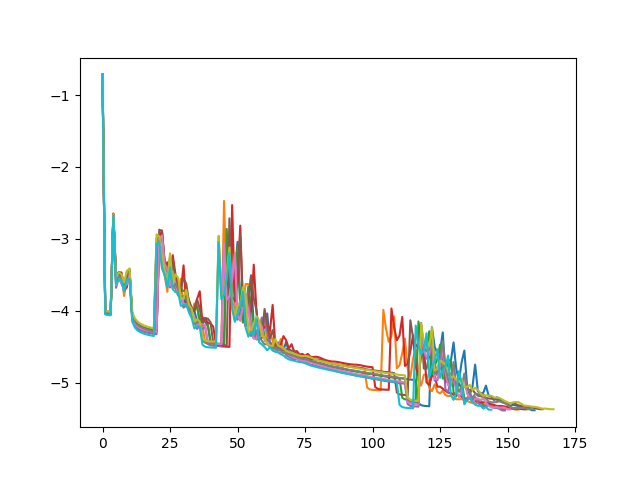

In [125]:
figure()
for i in range(10):
    main67 = EG.retrieve_main("article_experiments/dimension_67_MUBs.h5", exp_number=i)
    plot(np.log10(-main67['least_ev']))

<IPython.core.display.Javascript object>


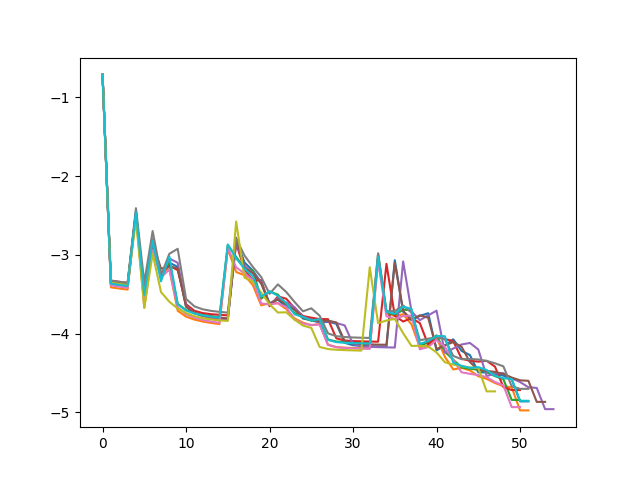

In [128]:
figure()
for i in range(10):
    main31 = EG.retrieve_main("article_experiments/dimension_31_MUBs.h5", exp_number=i)
    plot(np.log10(-main31['least_ev']))

<IPython.core.display.Javascript object>


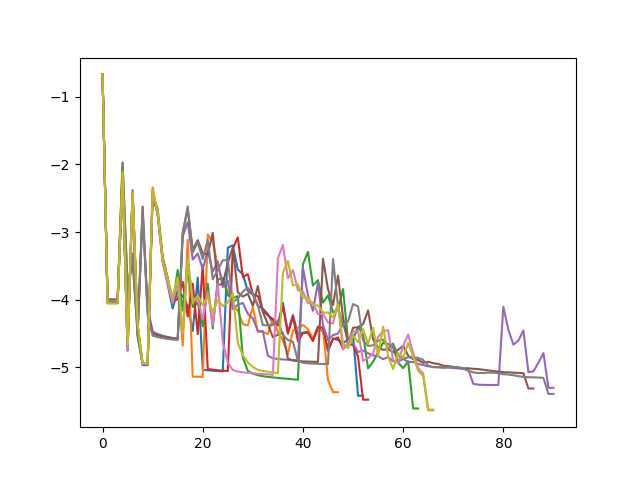

In [129]:
figure()
for i in range(9):
    main64 = EG.retrieve_main("article_experiments/dimension_6_qubits_bis.h5", exp_number=i)
    plot(np.log10(-main64['least_ev']))

In [135]:
M31 = EG.tables.open_file("article_experiments/dimension_31_MUBs.h5",'r')

M31.root.exp_repet0.initialisation.cols.data_generation_and_LS_time[0],\
M31.root.exp_repet0.initialisation.cols.CP_proj_time[0],\
M31.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:10],\
M31.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[-10:],\
M31.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[:10],\
M31.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[-10:],\
M31.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:].max()

(0.15464889002032578,
 0.2869493319885805,
 array([0.42304483, 0.42158178, 0.35742793, 0.34009302, 0.34085922,
        0.53773734, 0.51278891, 0.44760062, 0.34428006, 0.33478953]),
 array([0.34273614, 0.34584636, 0.3295783 , 0.33393996, 0.32086422,
        0.32488697, 0.31590568, 0.31514427, 0.30476801, 0.31437426]),
 array([0.00711567, 0.02199808, 0.02048664, 0.02875661, 0.04082149,
        0.06697739, 0.05666864, 0.06334803, 0.07081022, 0.02133718]),
 array([0.0708705 , 0.07619409, 0.07613725, 0.08106808, 0.08523289,
        0.08496115, 0.08548794, 0.09091239, 0.08428513, 0.02087268]),
 0.6177583649987355)

In [136]:
M31.close()

In [134]:
M11 = EG.tables.open_file("article_experiments/dimension_11_MUBs.h5",'r')

M11.root.exp_repet0.initialisation.cols.data_generation_and_LS_time[0],\
M11.root.exp_repet0.initialisation.cols.CP_proj_time[0],\
M11.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:10],\
M11.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[-10:],\
M11.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[:10],\
M11.root.exp_repet0.projection_HIPswitch.loops.cols.TP_proj_time[-10:],\
M11.root.exp_repet0.projection_HIPswitch.loops.cols.CP_proj_time[:].max()

(0.017001469037495553,
 0.030177484033629298,
 array([0.00948599, 0.00794666, 0.00885638, 0.00926591, 0.00923908,
        0.00818891, 0.0065423 , 0.00620375, 0.00625105, 0.00629492]),
 array([0.0065423 , 0.00620375, 0.00625105, 0.00629492, 0.0064821 ,
        0.00660687, 0.00746675, 0.00735586, 0.0074428 , 0.00638107]),
 array([0.00016408, 0.00082036, 0.00070397, 0.00238313, 0.00187692,
        0.00199937, 0.00096117, 0.00070489, 0.00068616, 0.00067941]),
 array([0.00096117, 0.00070489, 0.00068616, 0.00067941, 0.0006784 ,
        0.00067604, 0.00130111, 0.00169227, 0.00175982, 0.00095598]),
 0.00948599202092737)

In [139]:
def randherm(d):
    a = EG.SS.norm.rvs(size=(d,d))
    return (1 + 1j) * a + (1 - 1j) * a.T 

In [140]:
%timeit EG.SL.eigh(randherm(37))

409 µs ± 379 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [141]:
EG.proj_CP_threshold??